In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.8633179664611816


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
# NOTE:
# 複数の Description を持つ商品があるらしい。

print('# of unique StockCode', df_sales['StockCode'].nunique())
print('# of unique Description', df_sales['Description'].nunique())

# of unique StockCode 3922
# of unique Description 4026


In [14]:
# Description が複数ある商品の Description を実際にチェックする。

df_stockcode_description = \
pd.DataFrame(df_sales.groupby('StockCode')['Description'].nunique())
df_stockcode_description[df_stockcode_description['Description'] > 1]

target_items = df_stockcode_description[df_stockcode_description['Description'] > 1].index

df_sales[df_sales['StockCode'].isin(target_items)][['StockCode', 'Description']].drop_duplicates().sort_values('StockCode')

,StockCode,Description
134864,16156L,WRAP CAROUSEL
46105,16156L,"WRAP, CAROUSEL"
6373,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS"
339660,17107D,FLOWER FAIRY 5 SUMMER DRAW LINERS
308263,17107D,FLOWER FAIRY 5 DRAWER LINERS
237777,20622,VIP PASSPORT COVER
1846,20622,VIPPASSPORT COVER
93,20725,LUNCH BAG RED RETROSPOT
56789,20725,LUNCH BAG RED SPOTTY
406,20914,SET/5 RED RETROSPOT LID GLASS BOWLS


In [15]:
target_items.shape

(220,)

In [23]:
# 国別に購入されている商品の構成をみると、類似した需要の国が見出せるのではないか？

df_country_item = \
pd.DataFrame(df_sales.groupby(['Country', 'StockCode'])['Quantity'].sum()).reset_index().set_index('Country')
display(df_country_item.head())

,StockCode,Quantity
Country,,
Australia,15036,600
Australia,15056BL,3
Australia,16161P,400
Australia,16169E,25
Australia,20665,6


In [31]:
df_country_quantity = \
pd.DataFrame(df_sales.groupby('Country')['Quantity'].sum()).rename(columns={'Quantity': 'QuantitySum'})

df_country = df_country_item.join(df_country_quantity, how='left')

df_country['Quantity_%'] = (df_country['Quantity'] / df_country['QuantitySum']) * 100
df_country.head()

,StockCode,Quantity,QuantitySum,Quantity_%
Country,,,,
Australia,15036,600,83901,0.715129
Australia,15056BL,3,83901,0.003576
Australia,16161P,400,83901,0.476752
Australia,16169E,25,83901,0.029797
Australia,20665,6,83901,0.007151


In [34]:
df_country.reset_index().set_index(['Country', 'StockCode'])

Quantity  QuantitySum  Quantity_%
Country     StockCode                                   
Australia   15036           600        83901    0.715129
            15056BL           3        83901    0.003576
            16161P          400        83901    0.476752
            16169E           25        83901    0.029797
            20665             6        83901    0.007151
            20675           216        83901    0.257446
            20676           216        83901    0.257446
            20677           216        83901    0.257446
            20685            50        83901    0.059594
            20711           100        83901    0.119188
            20712            30        83901    0.035756
            20713            10        83901    0.011919
            20717            10        83901    0.011919
            20725           281        83901    0.334919
            20726           270        83901    0.321808
            20727           140        83901    0.166863
            20728            50        83901    0.059594
            20749             4        83901    0.004768
            20750             4        83901    0.004768
            20837            12        83901    0.014303
            20838            12        83901    0.014303
            20840            24        83901    0.028605
            20971            12        83901    0.014303
            20973           384        83901    0.457682
            20978           128        83901    0.152561
            20979           385        83901    0.458874
            20983            12        83901    0.014303
            20984           252        83901    0.300354
            21056             3        83901    0.003576
            21058           204        83901    0.243144
...                         ...          ...         ...
Unspecified 84375             3         3300    0.090909
            84378             9         3300    0.272727
            84459A            2         3300    0.060606
            84548             7         3300    0.212121
            84549             1         3300    0.030303
            84559A            2         3300    0.060606
            84559B            1         3300    0.030303
            84813             1         3300    0.030303
            84821             1         3300    0.030303
            84836             2         3300    0.060606
            84877A           24         3300    0.727273
            84879            22         3300    0.666667
            84912B            1         3300    0.030303
            84913B            8         3300    0.242424
            84991            26         3300    0.787879
            84992            48         3300    1.454545
            84997C            2         3300    0.060606
            84997D            4         3300    0.121212
            85019B            2         3300    0.060606
            85049A            1         3300    0.030303
            85125             3         3300    0.090909
            85172            16         3300    0.484848
            85175            16         3300    0.484848
            85179A            1         3300    0.030303
            85179C            1         3300    0.030303
            85180A            2         3300    0.060606
            85180B            1         3300    0.030303
            85212            12         3300    0.363636
            85213            12         3300    0.363636
            85227            10         3300    0.303030

[19658 rows x 3 columns]

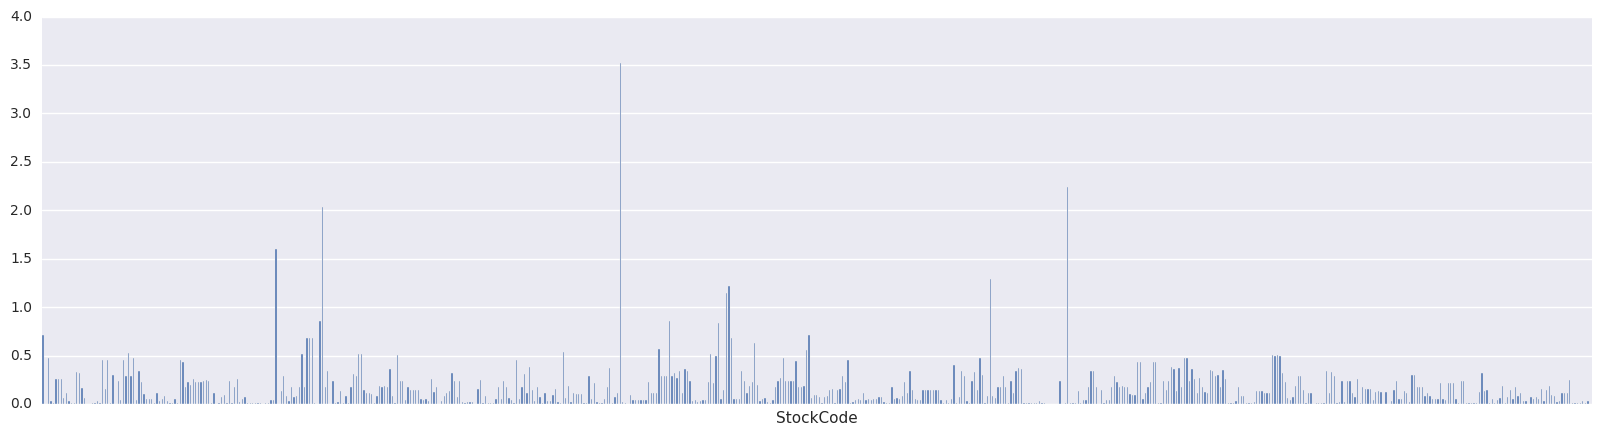

In [40]:
figsize = (20, 5)
country = 'Australia'
col = 'Quantity_%'
df_country.reset_index().set_index(['Country', 'StockCode']).loc[country, col].plot(kind='bar', figsize=figsize)
plt.xticks([])
plt.show()

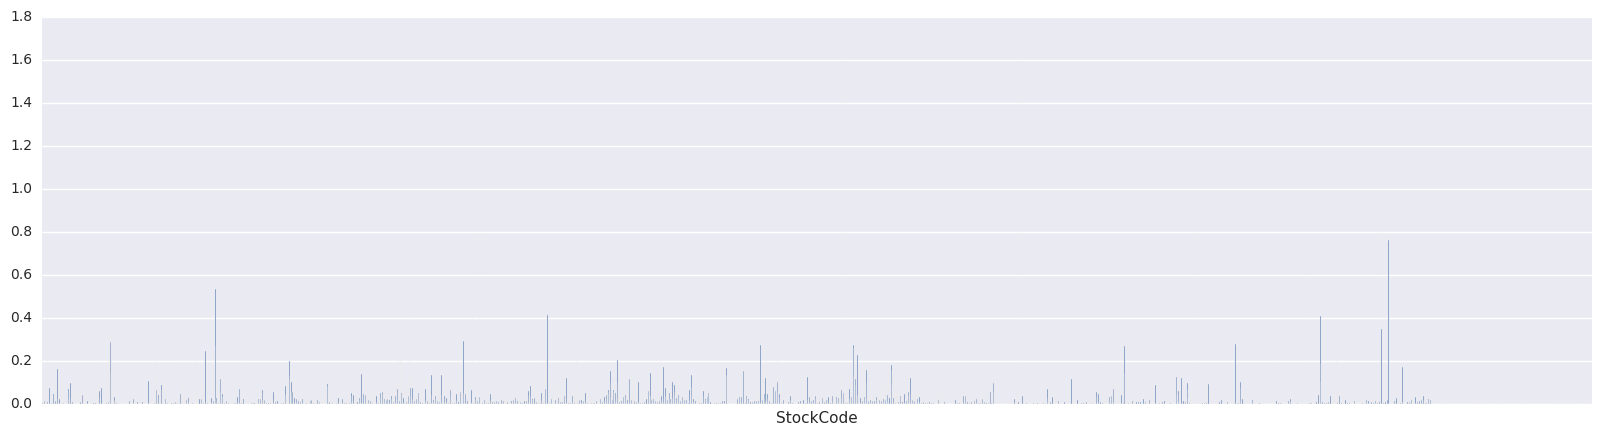

In [42]:
figsize = (20, 5)
country = 'United Kingdom'
col = 'Quantity_%'
df_country.reset_index().set_index(['Country', 'StockCode']).loc[country, col].plot(kind='bar', figsize=figsize)
plt.xticks([])
plt.show()

In [63]:
# 各商品の構成比でみたときに類似する Country 
df_country_item_matrix = \
df_country.reset_index().pivot(index='Country', columns='StockCode', values='Quantity_%').fillna(0)

In [65]:
df_country_item_matrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.001192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.758041,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bahrain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.183457,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
def plot_item_ratio_of(country):
    """Country を指定して その Country の商品の構成比をみる"""
    figsize = (20, 5)
    df_country_item_matrix.loc[country].T.plot(kind='bar', figsize=figsize)
    plt.xticks([])
    plt.title(country)
    plt.show()

In [75]:
from sklearn.metrics.pairwise import pairwise_distances

countries = df_country_item_matrix.index

distance_matrix = pairwise_distances(df_country_item_matrix, metric='cosine')
df_distance_matrix = pd.DataFrame(distance_matrix, index=countries, columns=countries)
display(df_distance_matrix.head())

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.000000,0.801014,0.980731,0.539517,0.822763,0.929023,0.808254,0.952743,0.986936,0.642169,...,0.861723,0.879502,0.953944,0.782028,0.571668,0.676158,0.739632,0.785287,0.692841,0.783075
Austria,0.801014,0.000000,0.955578,0.754331,0.945186,0.967059,0.915941,0.951542,0.967405,0.867641,...,0.942451,0.932490,0.953892,0.838554,0.822681,0.749997,0.874377,0.916443,0.838192,0.877030
Bahrain,0.980731,0.955578,0.000000,0.943286,0.955442,0.998307,0.999210,0.980694,1.000000,0.968629,...,0.999426,1.000000,0.998869,0.894837,0.996738,0.952057,0.963747,0.998844,0.941476,0.871335
Belgium,0.539517,0.754331,0.943286,0.000000,0.867171,0.927795,0.697795,0.959789,0.953303,0.686743,...,0.877548,0.919888,0.927288,0.727585,0.600790,0.436606,0.741401,0.882398,0.665404,0.727455
Brazil,0.822763,0.945186,0.955442,0.867171,0.000000,0.979519,0.931965,0.943883,1.000000,0.917205,...,0.992267,1.000000,0.966329,0.940480,0.996340,0.936822,0.984010,0.937763,0.895827,0.974554


In [108]:
df_distance_matrix['Australia'].sort_values().tail()

Country
Cyprus                0.952743
Singapore             0.953944
European Community    0.954143
Bahrain               0.980731
Czech Republic        0.986936
Name: Australia, dtype: float64

In [112]:
# 商品構成が最も類似する国
most_similar_country_dict = {}

for country in countries:
    dist_dict = df_distance_matrix.drop(country, axis=1).loc[country].sort_values().head(1).to_dict()
    most_similar_country_dict[country] = dist_dict
    print(country, ': ', dist_dict)

Australia :  {'France': 0.35529822346445539}
Austria :  {'Germany': 0.72751881271119823}
Bahrain :  {'Iceland': 0.55035772977933006}
Belgium :  {'Netherlands': 0.28427202537745655}
Brazil :  {'EIRE': 0.80622801257731669}
Canada :  {'Sweden': 0.76526982597608539}
Channel Islands :  {'United Kingdom': 0.61329239828792093}
Cyprus :  {'United Kingdom': 0.79927943392403389}
Czech Republic :  {'United Kingdom': 0.91821063154217097}
Denmark :  {'Germany': 0.63663139227987919}
EIRE :  {'United Kingdom': 0.45913323934807038}
European Community :  {'Germany': 0.82867910095624464}
Finland :  {'Spain': 0.41290738395853344}
France :  {'Netherlands': 0.33629927744659038}
Germany :  {'Switzerland': 0.37156549875376443}
Greece :  {'Lebanon': 0.81222594127462711}
Hong Kong :  {'Spain': 0.64818743755484376}
Iceland :  {'Bahrain': 0.55035772977933006}
Israel :  {'Netherlands': 0.6044145080502592}
Italy :  {'Germany': 0.63350992978981824}
Japan :  {'France': 0.45318276924558543}
Lebanon :  {'Greece': 0.81

Australia


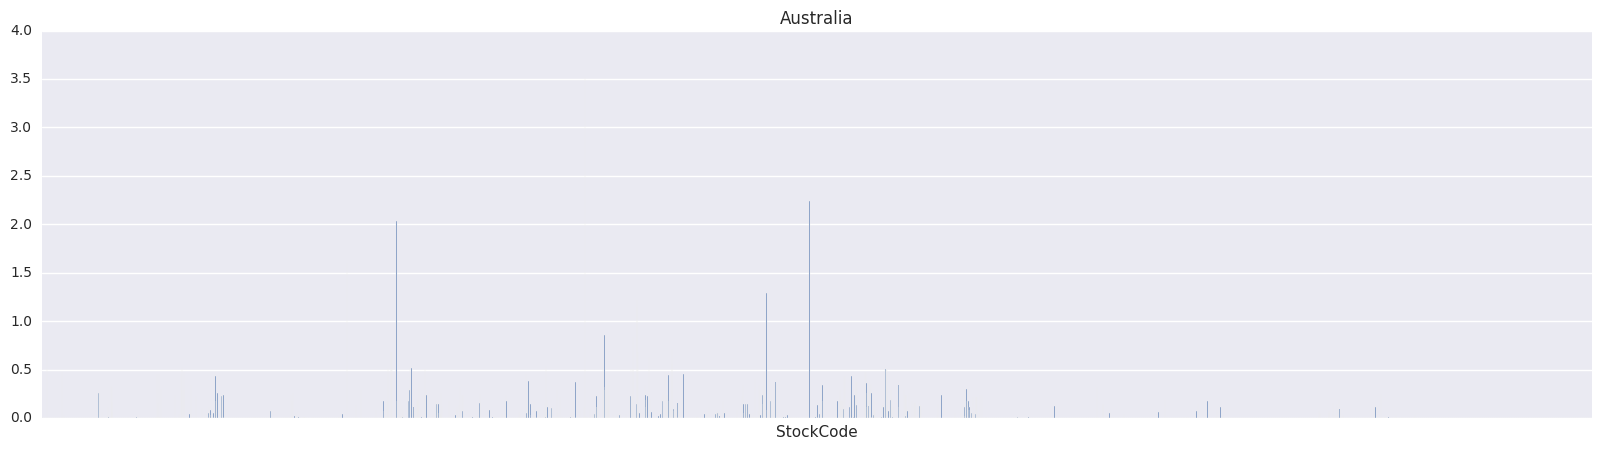

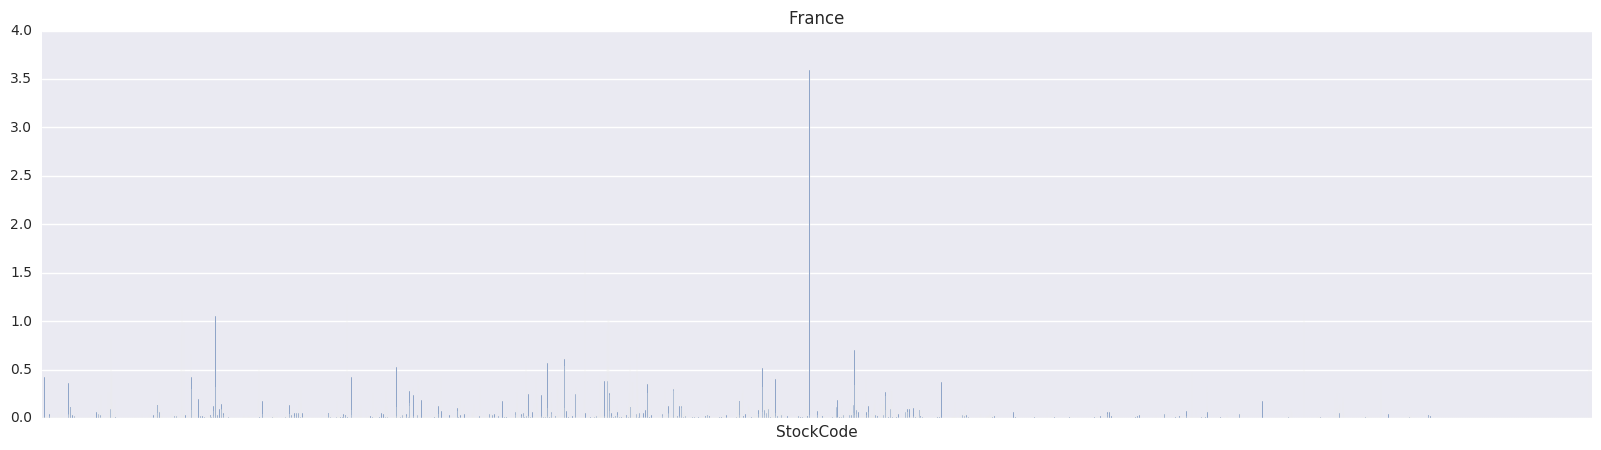

Austria


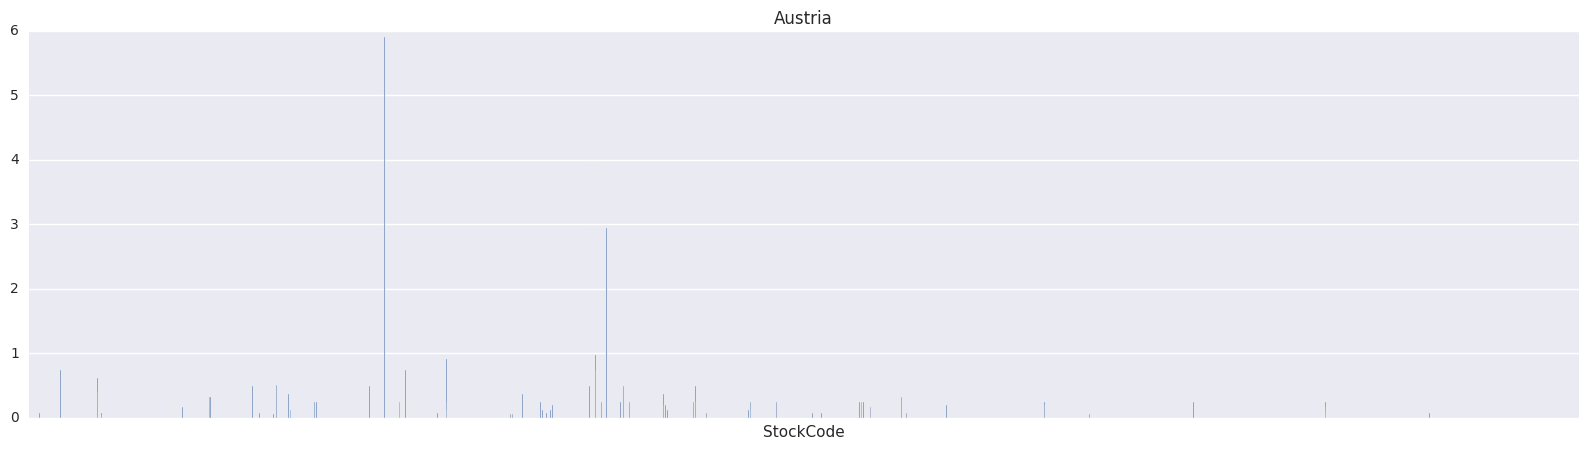

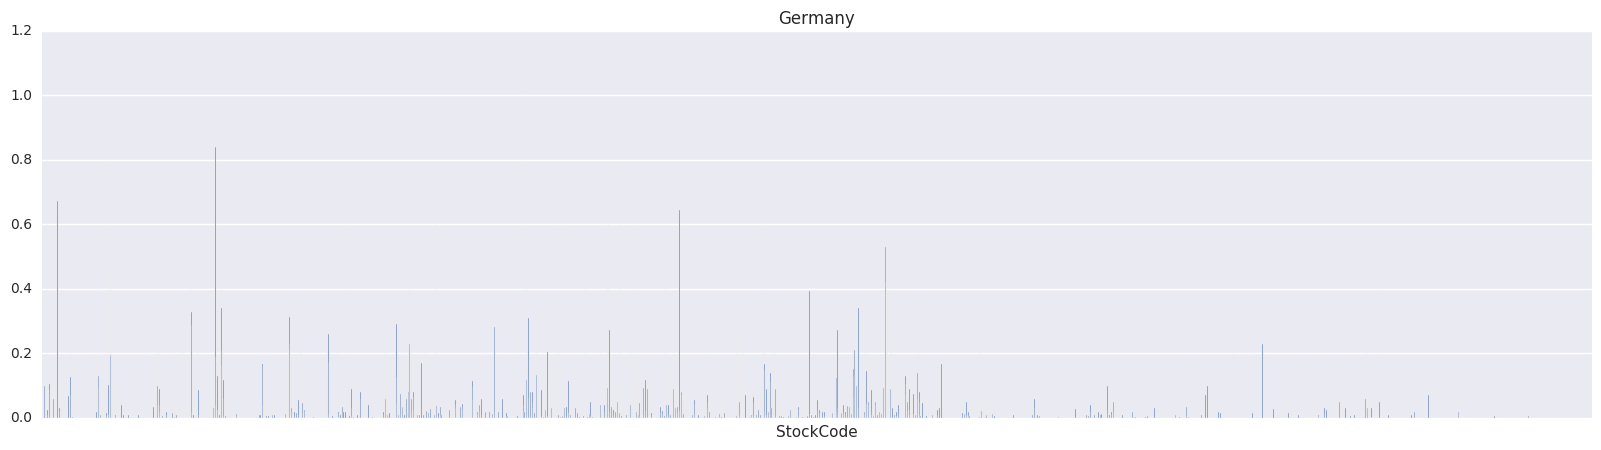

Bahrain


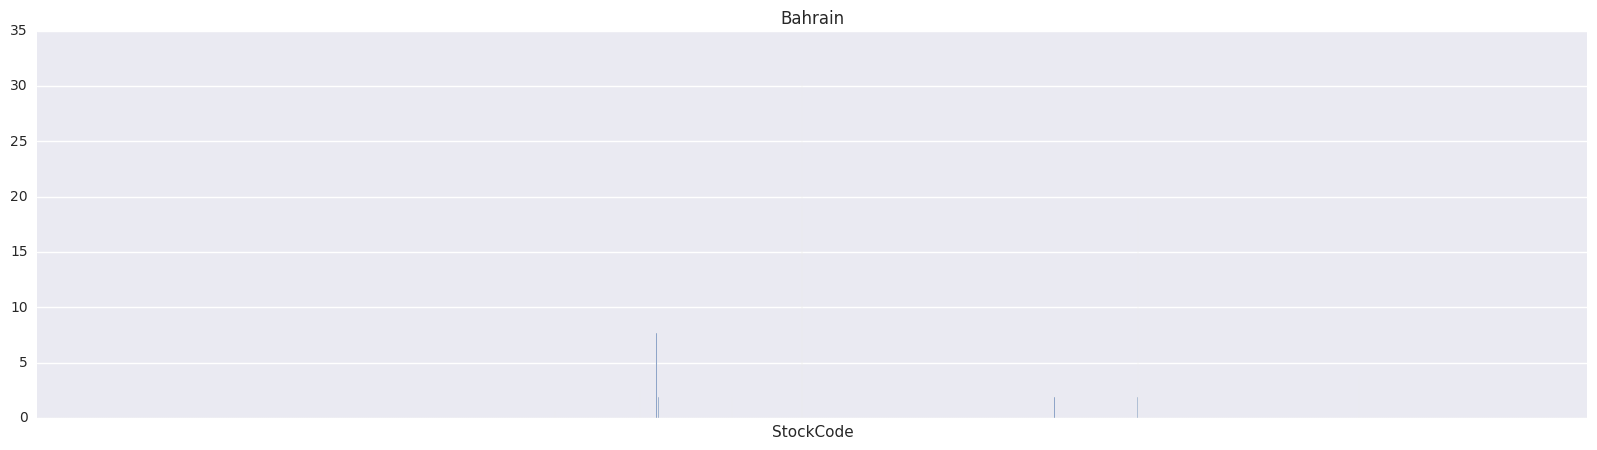

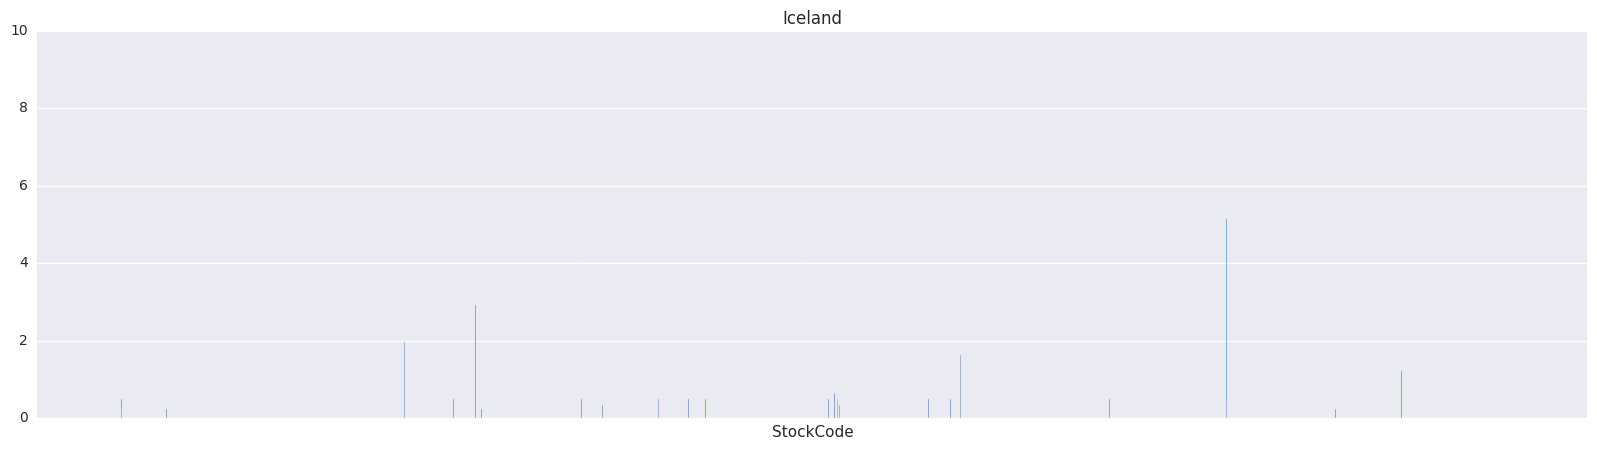

Belgium


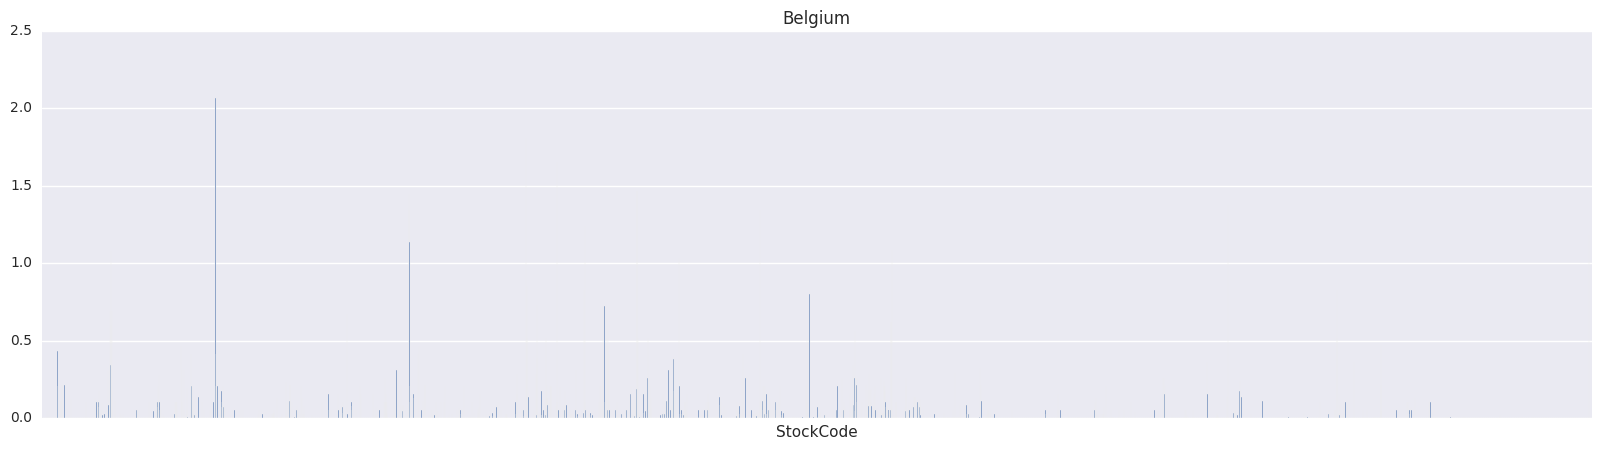

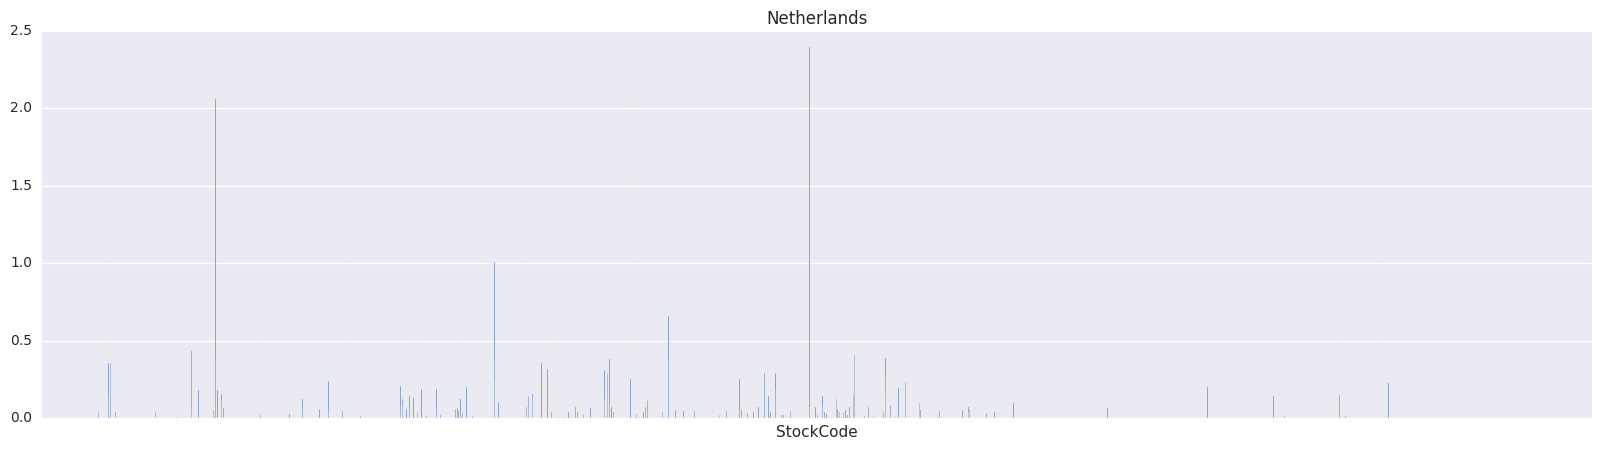

Brazil


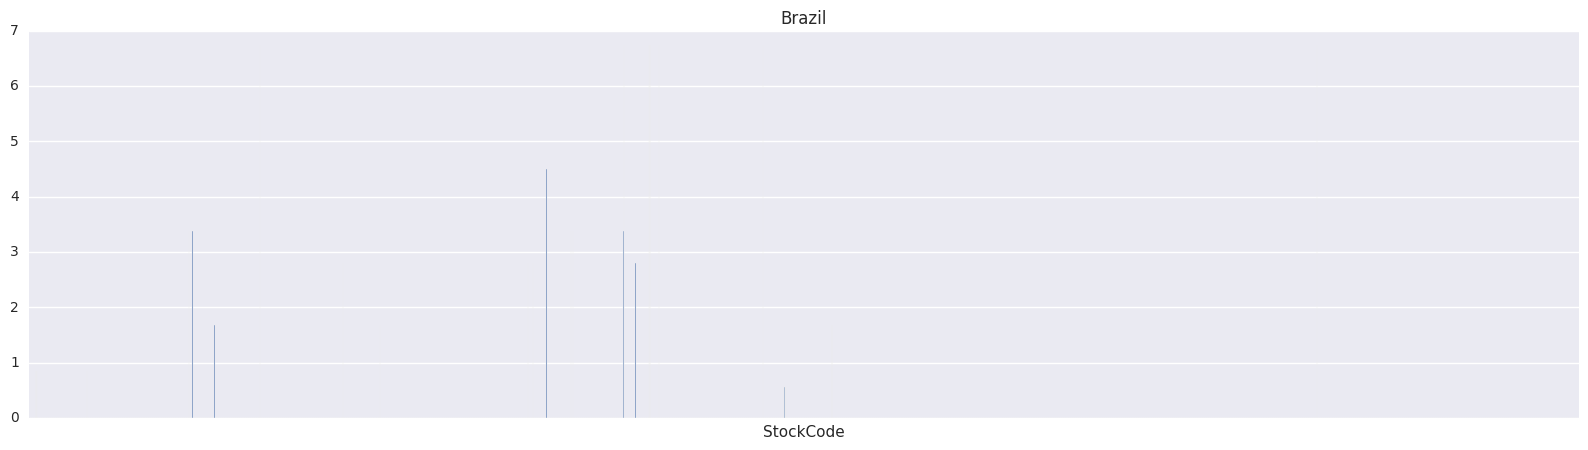

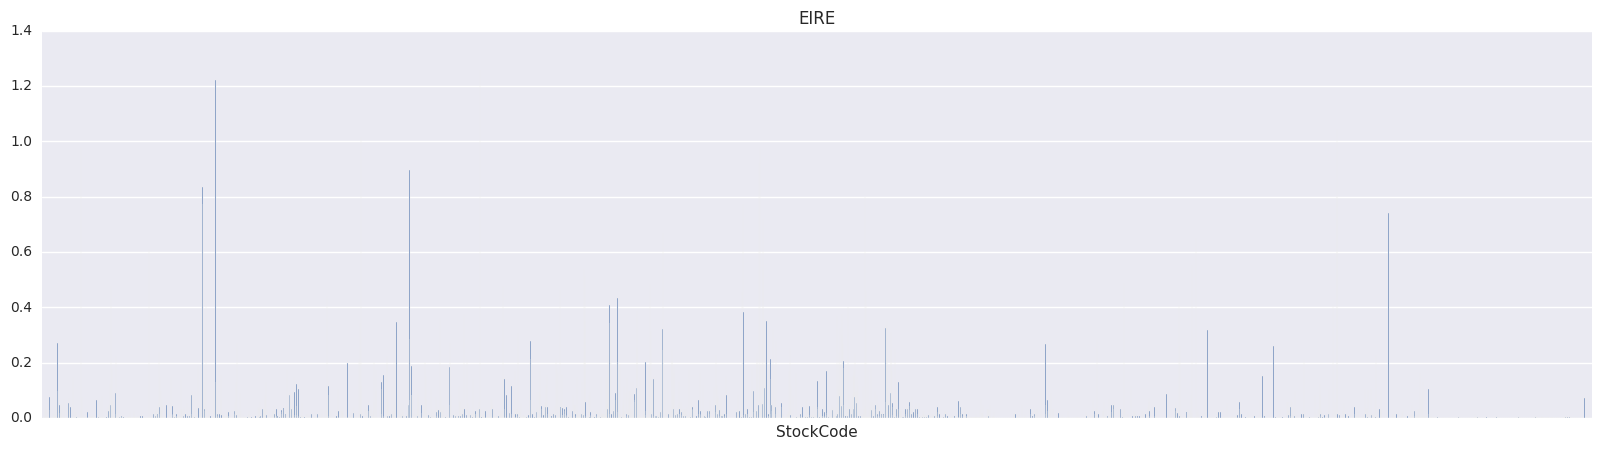

Canada


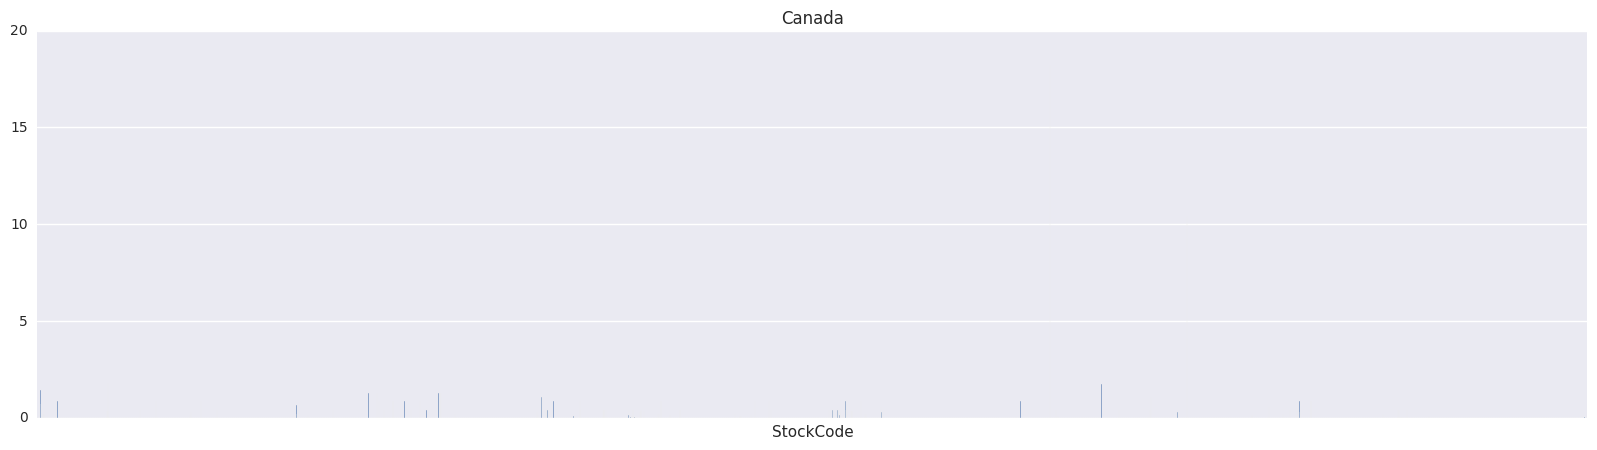

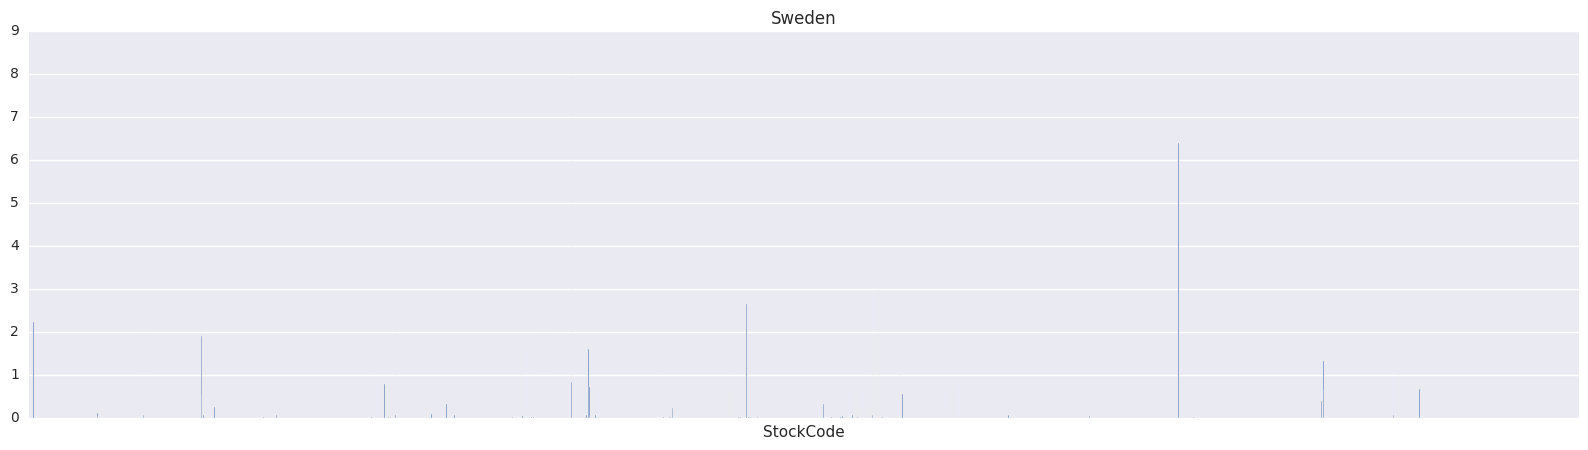

Channel Islands


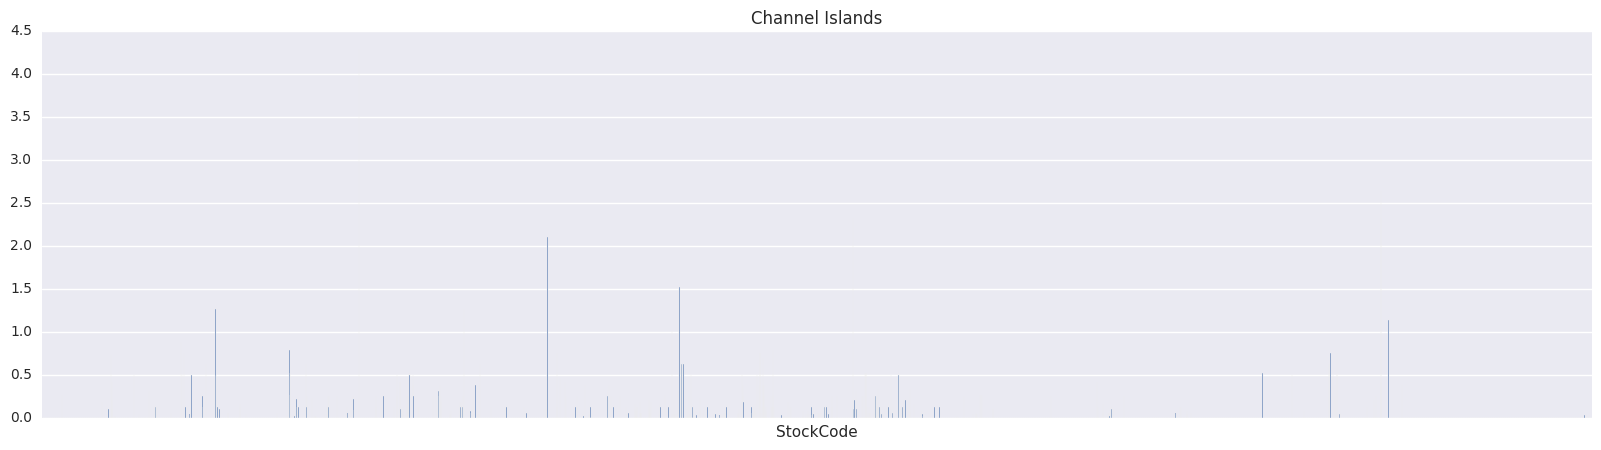

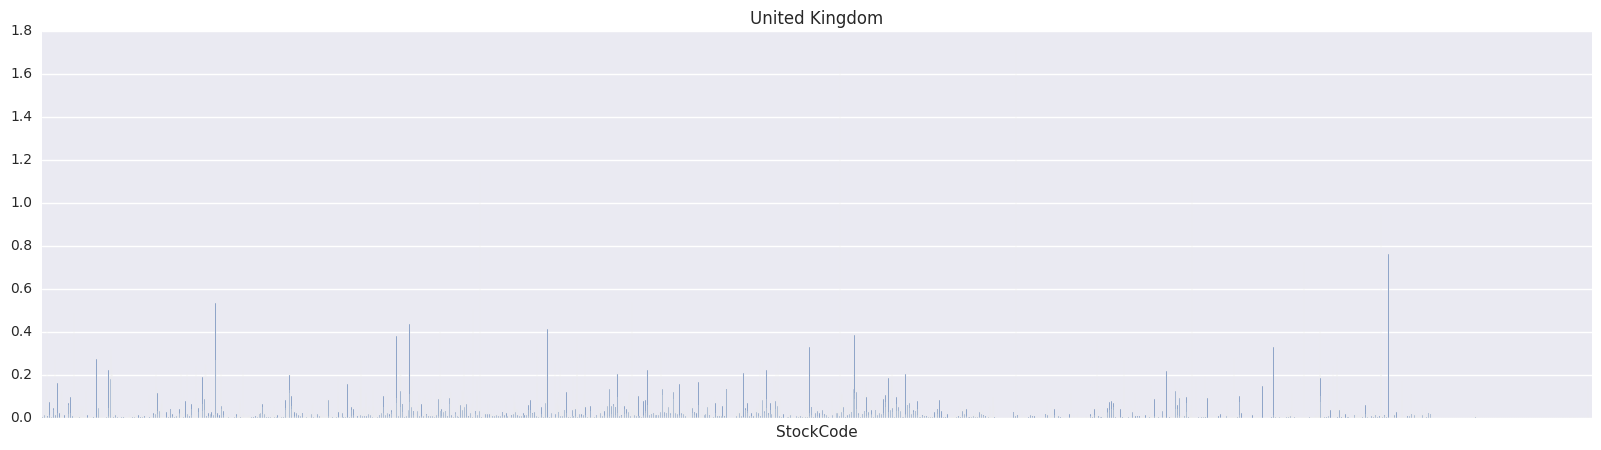

Cyprus


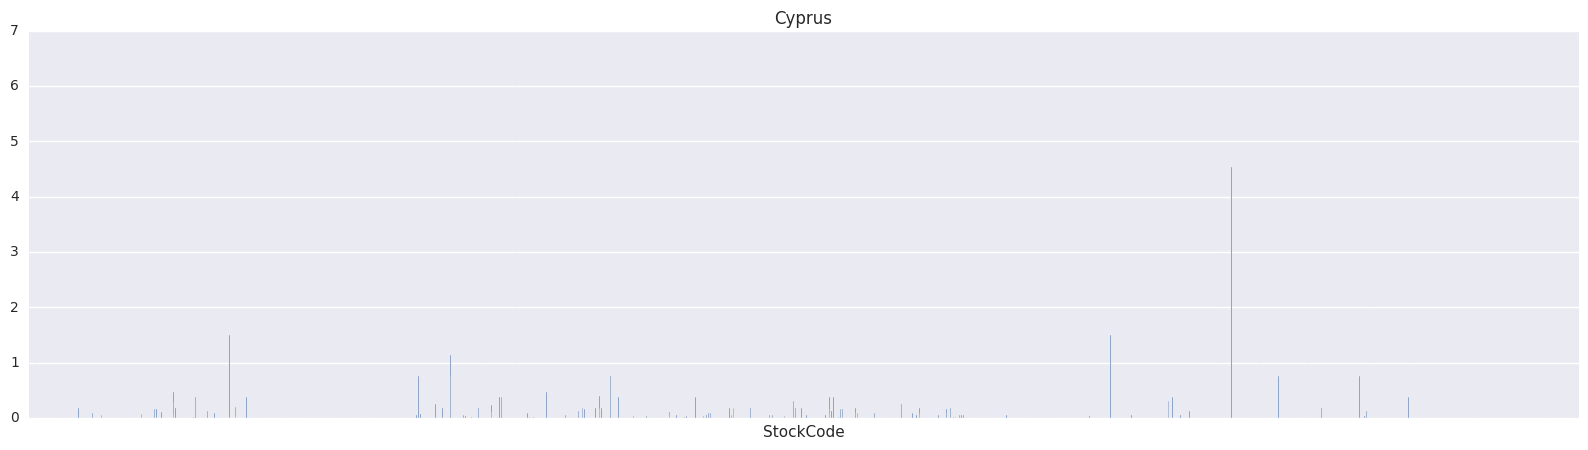

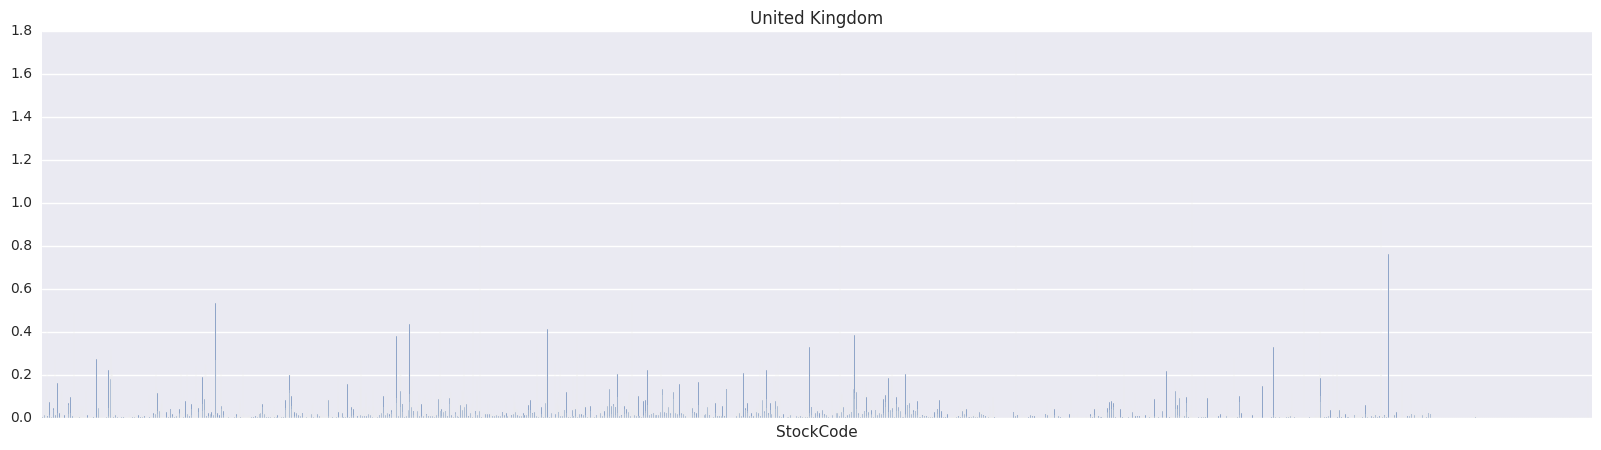

Czech Republic


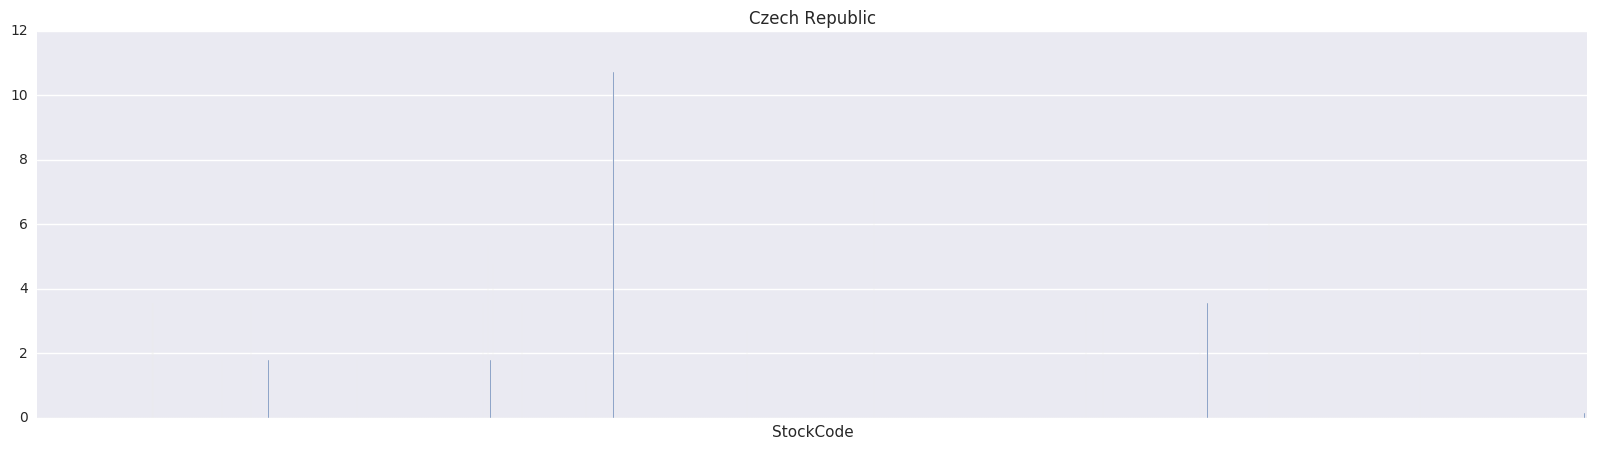

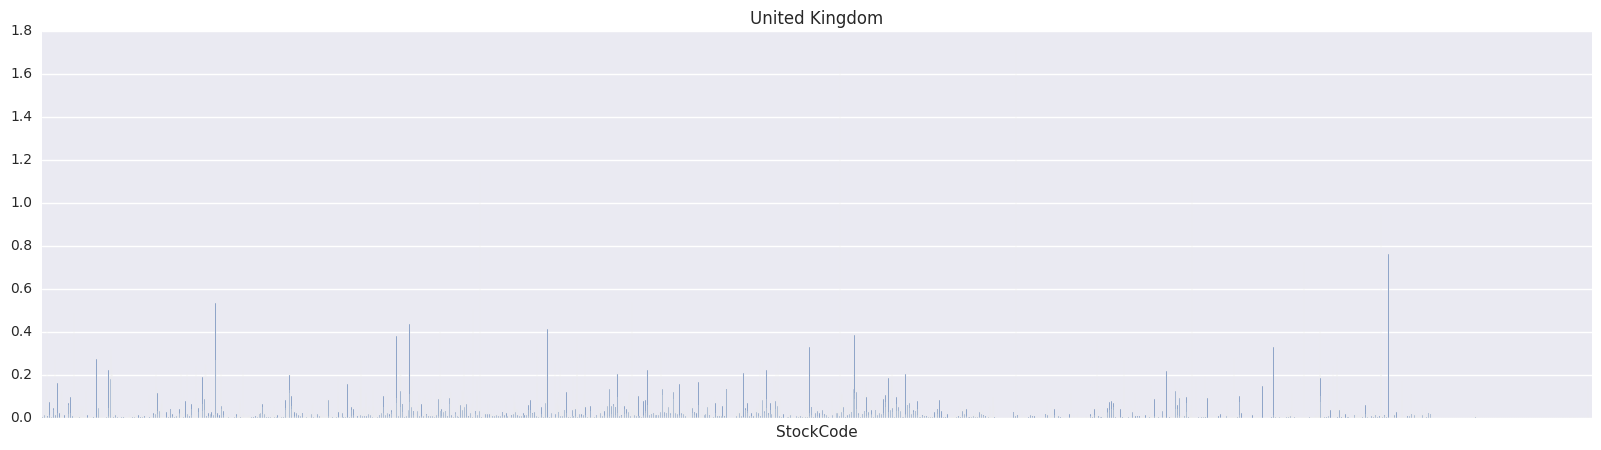

Denmark


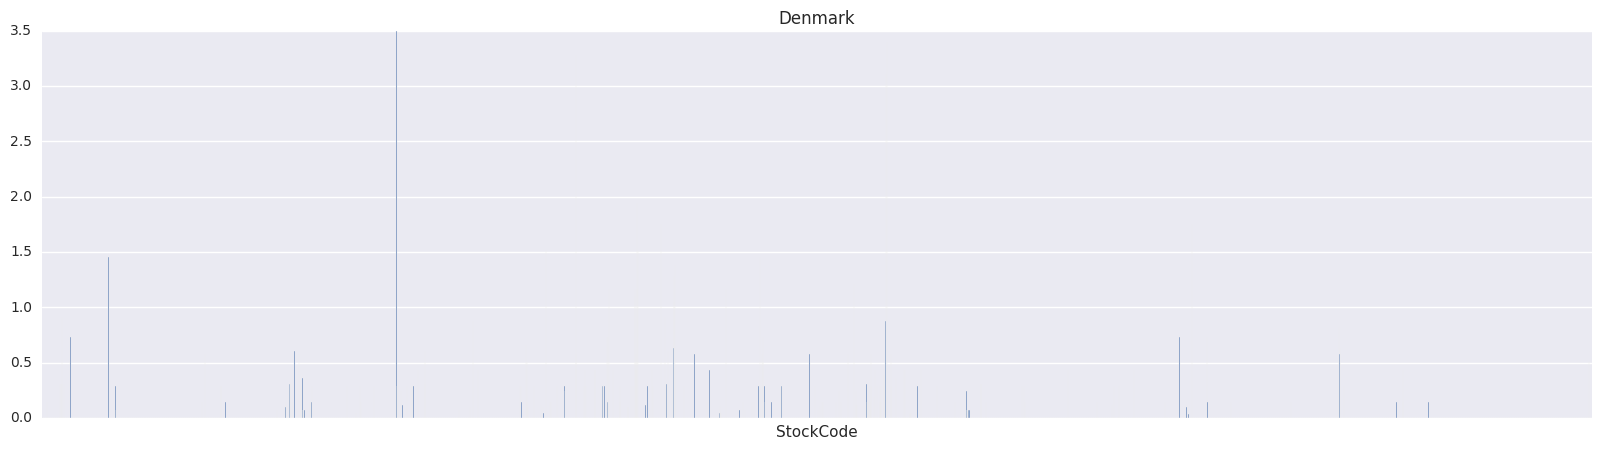

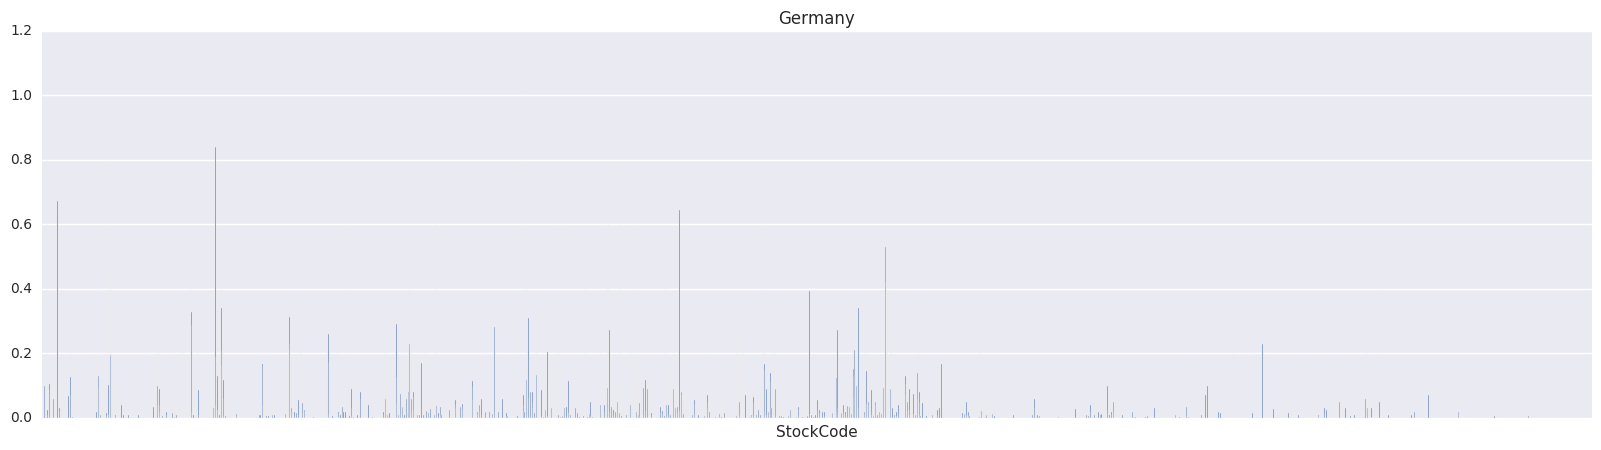

EIRE


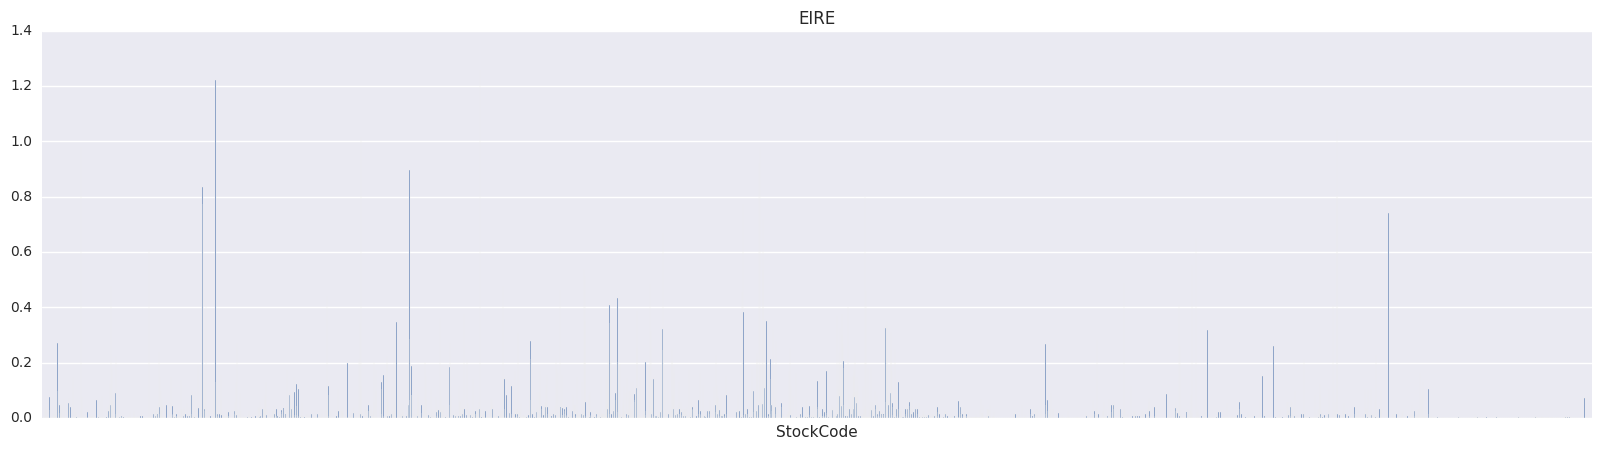

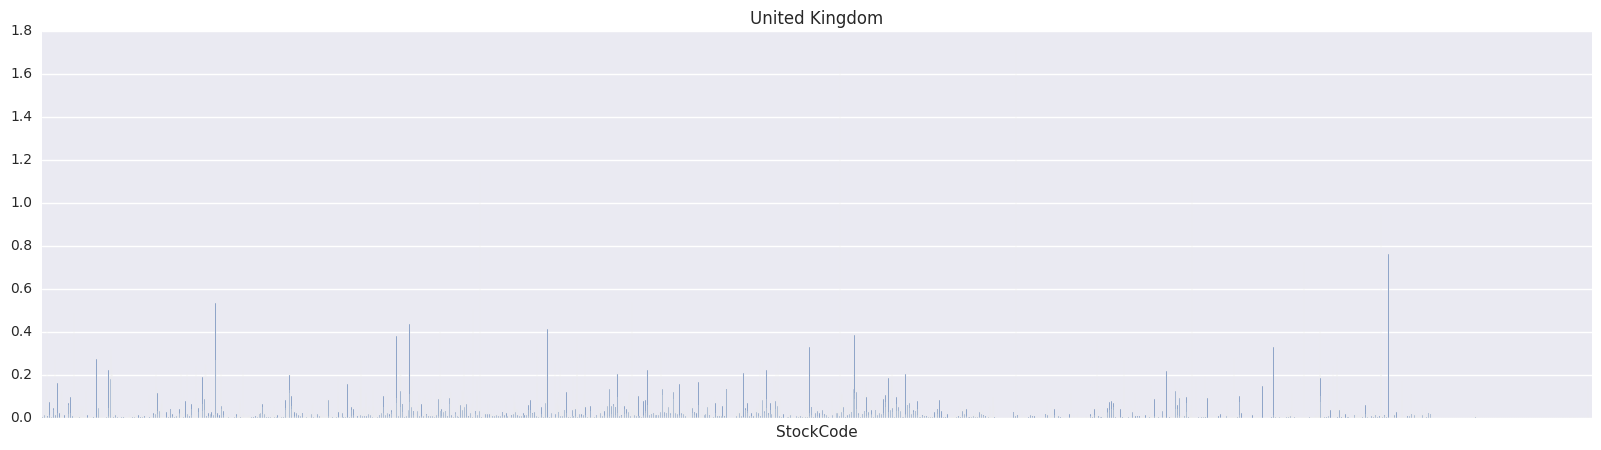

European Community


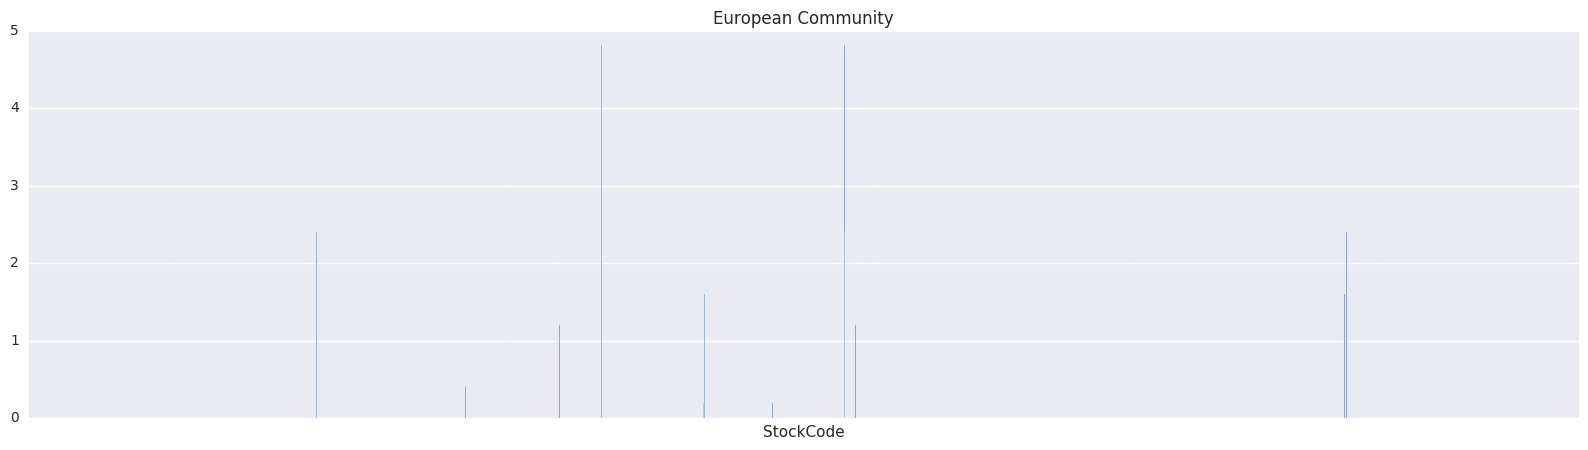

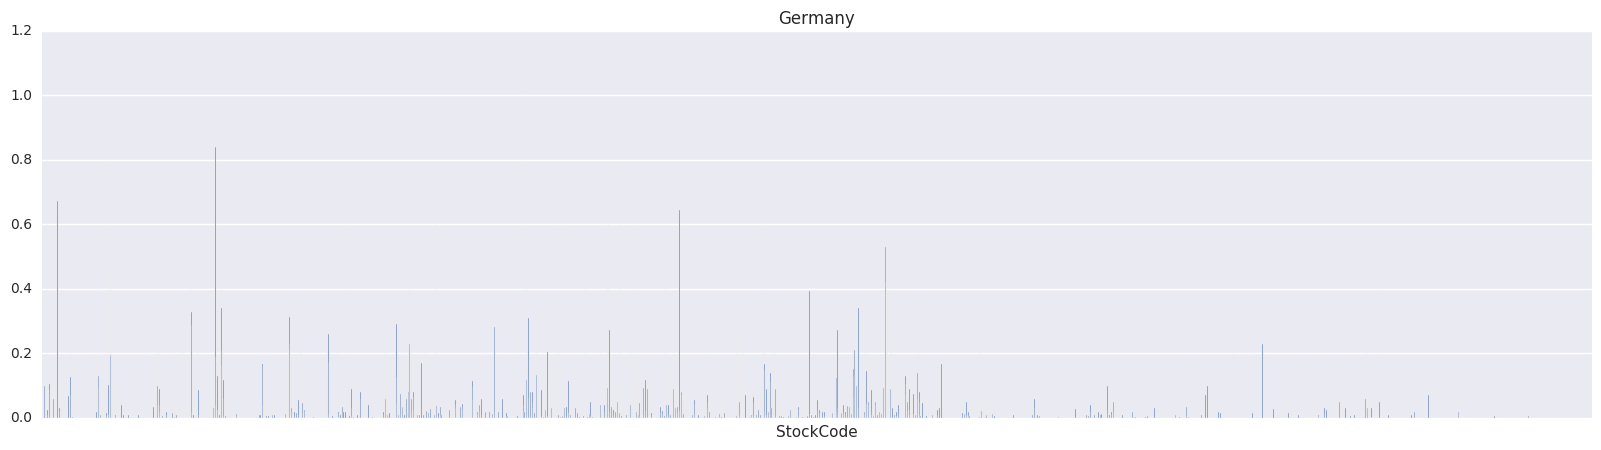

Finland


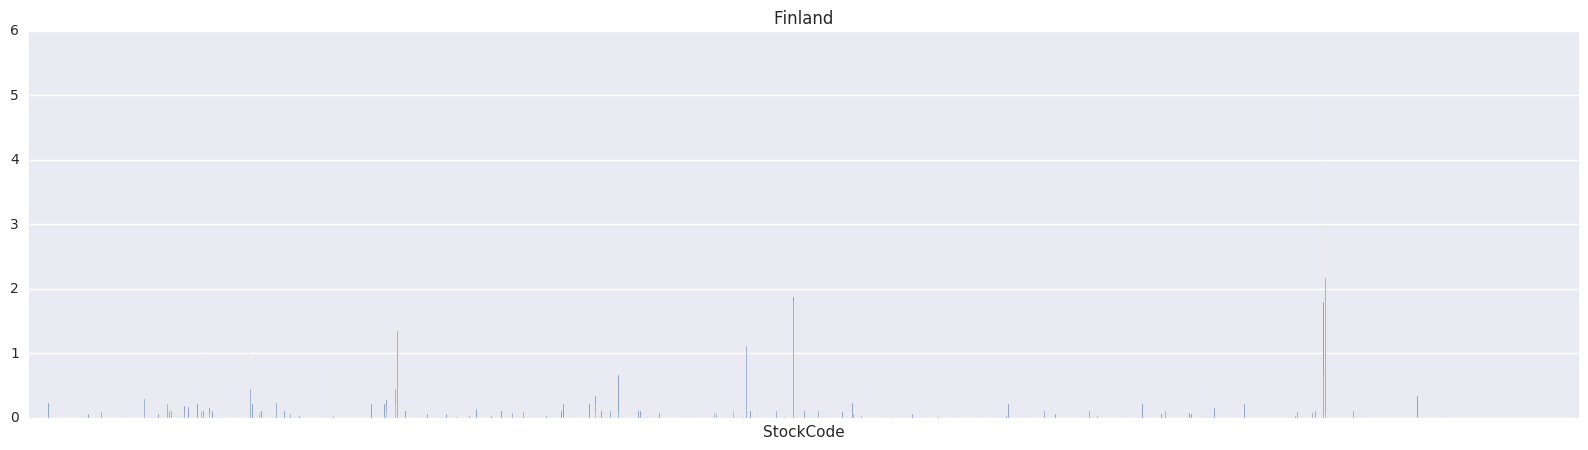

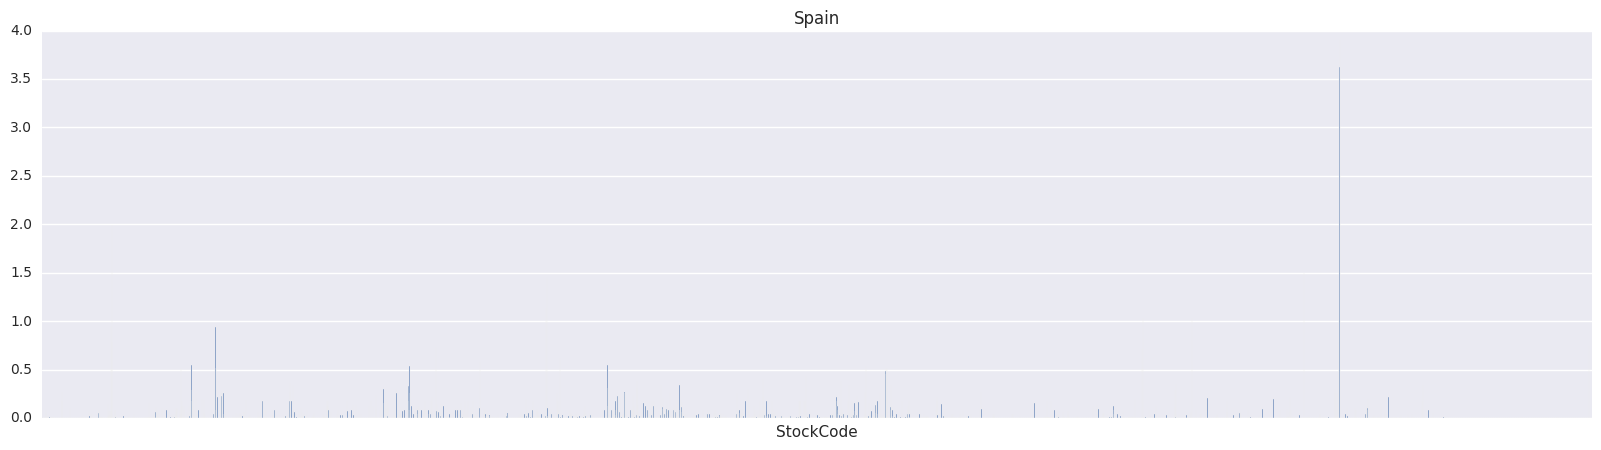

France


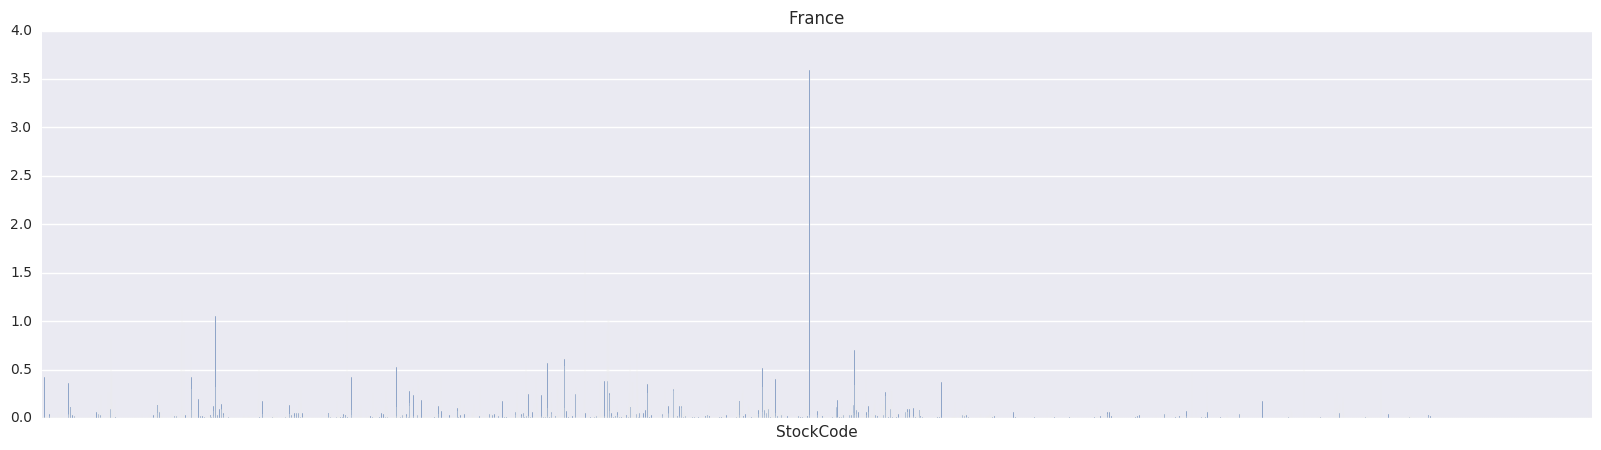

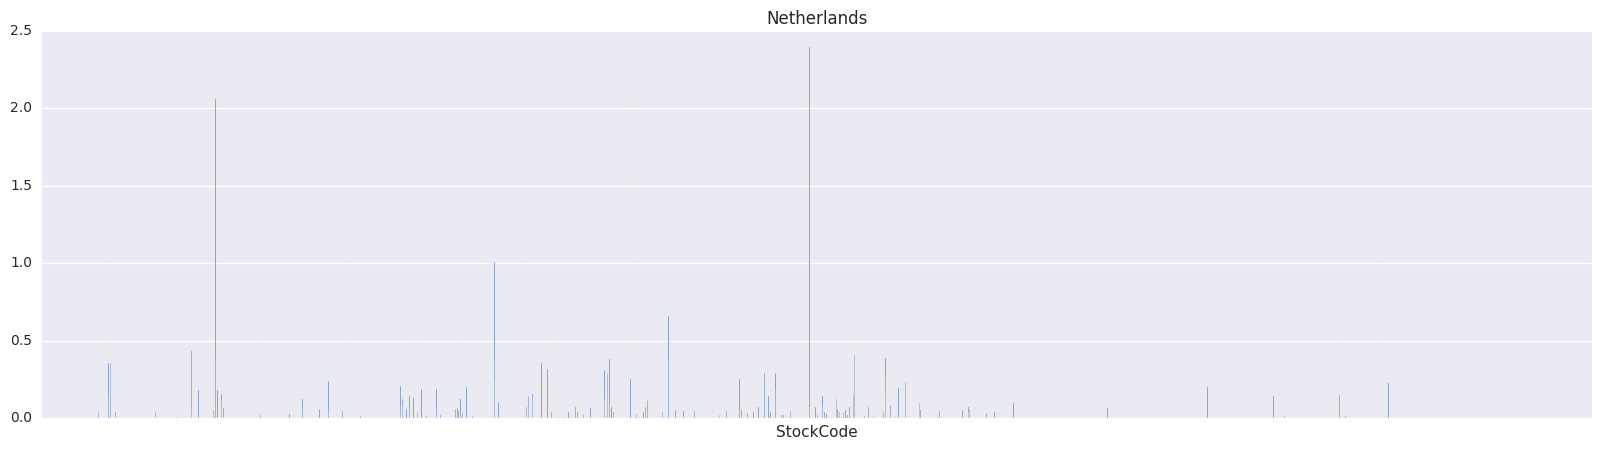

Germany


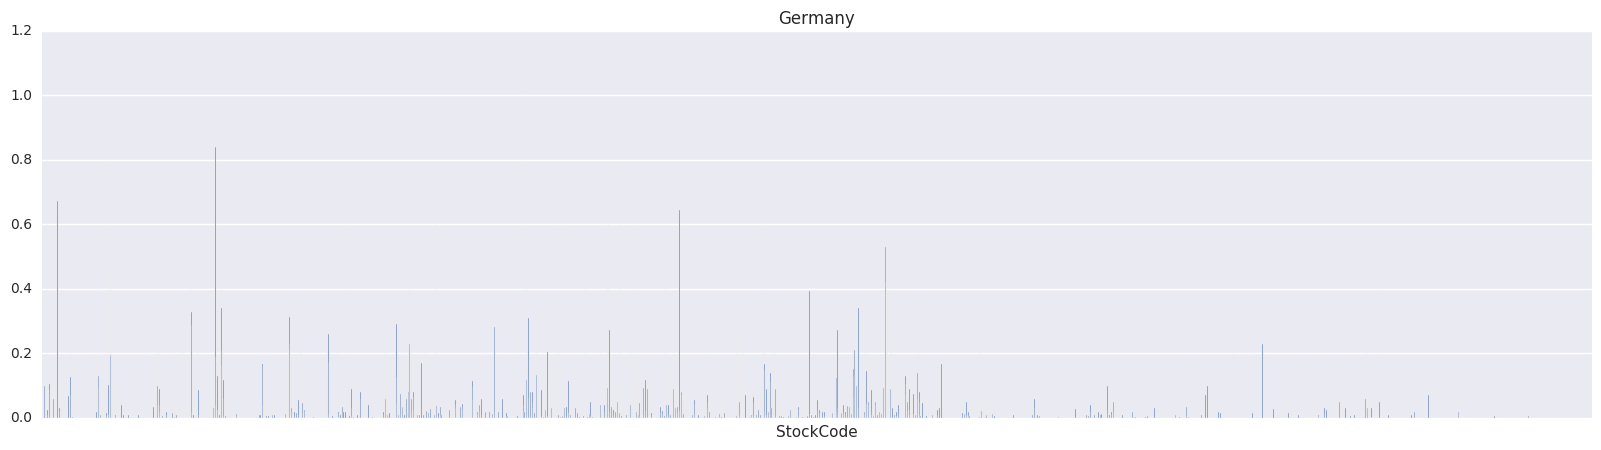

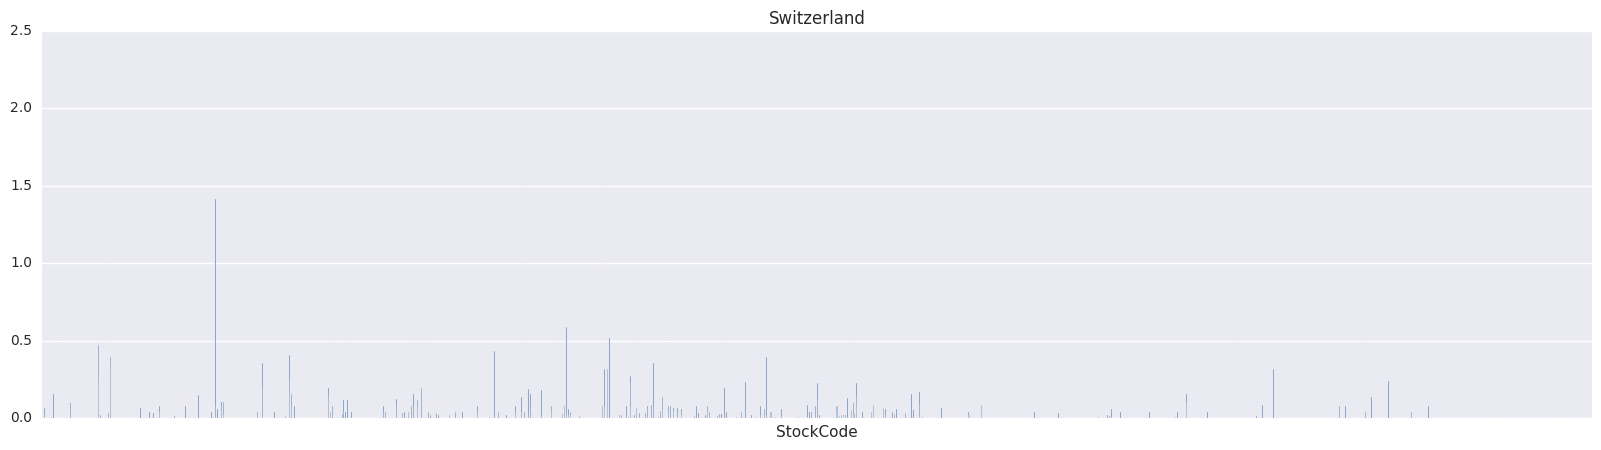

Greece


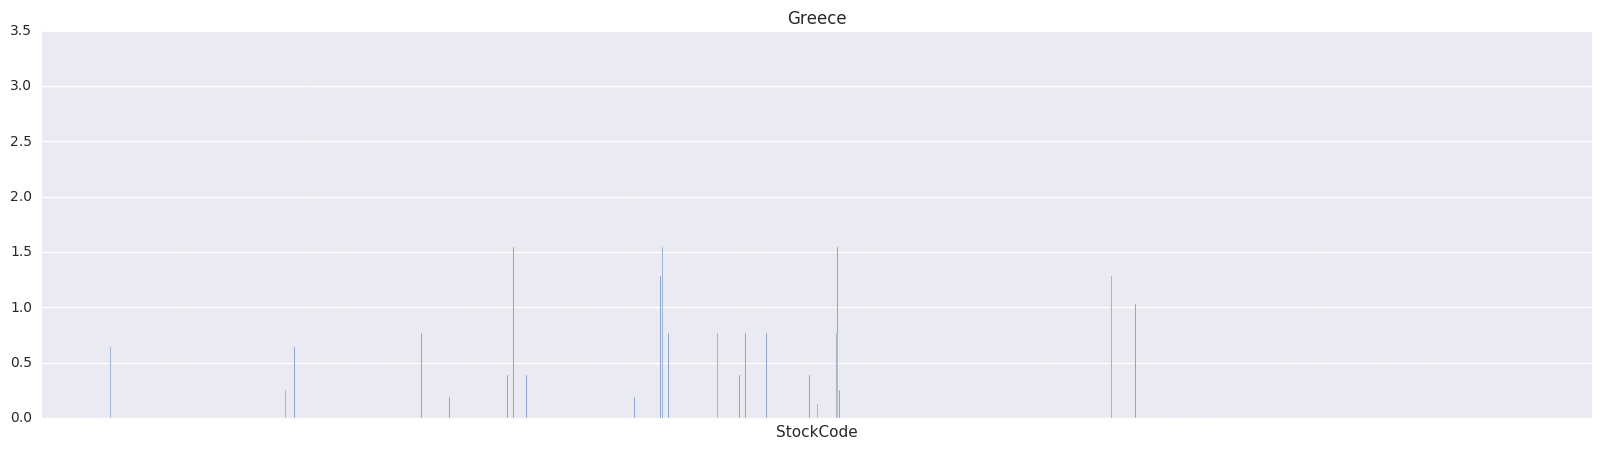

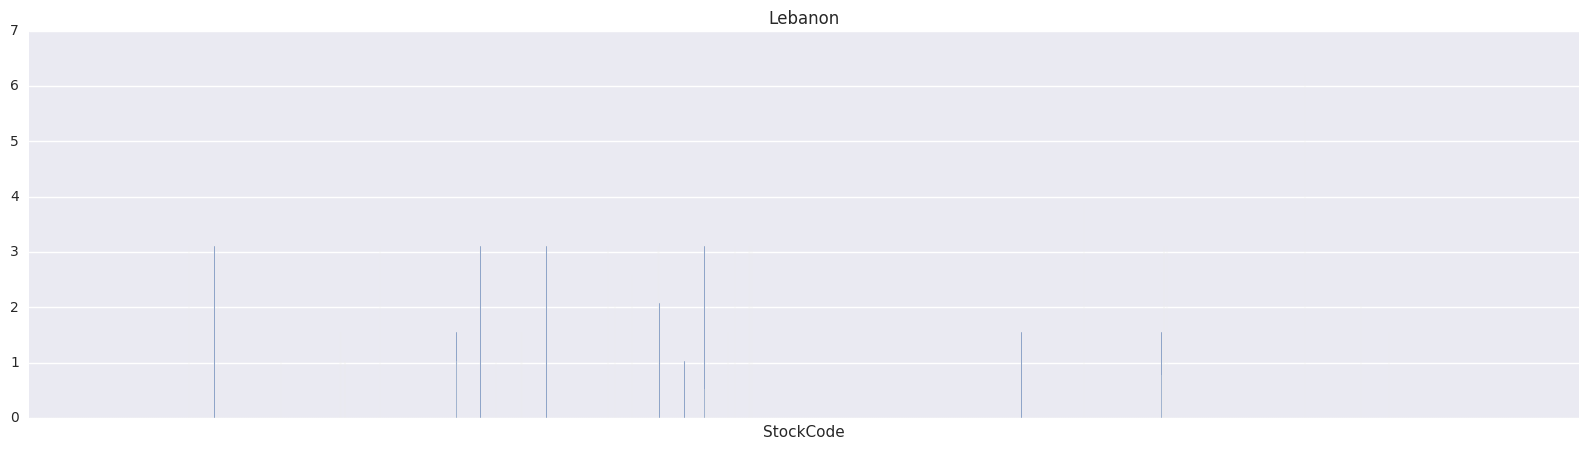

Hong Kong


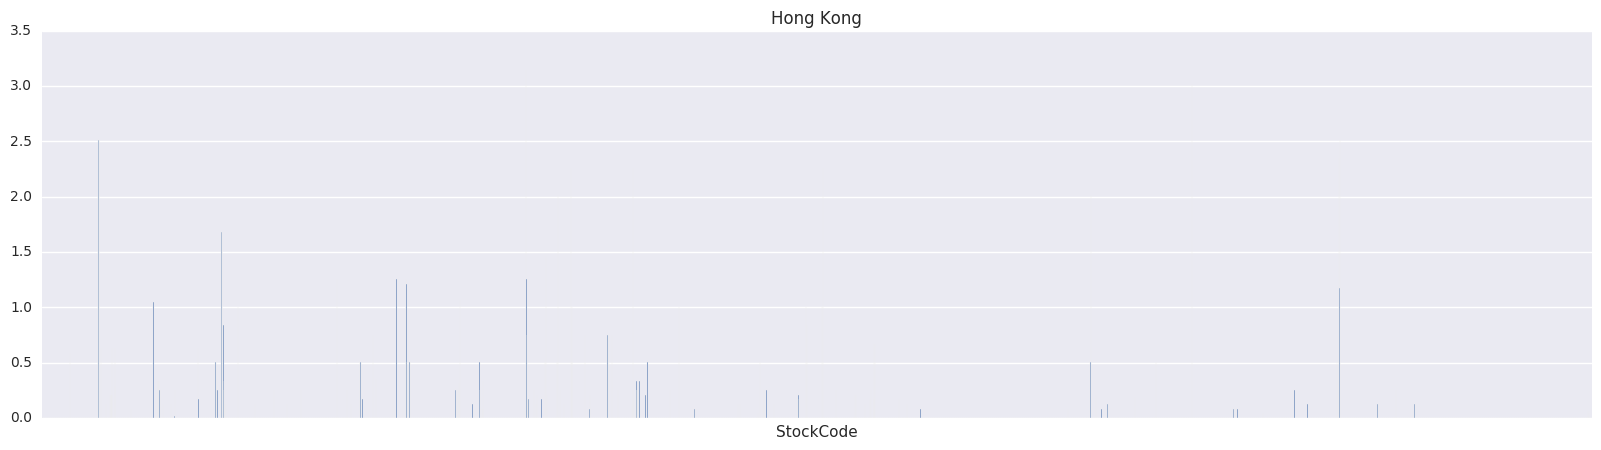

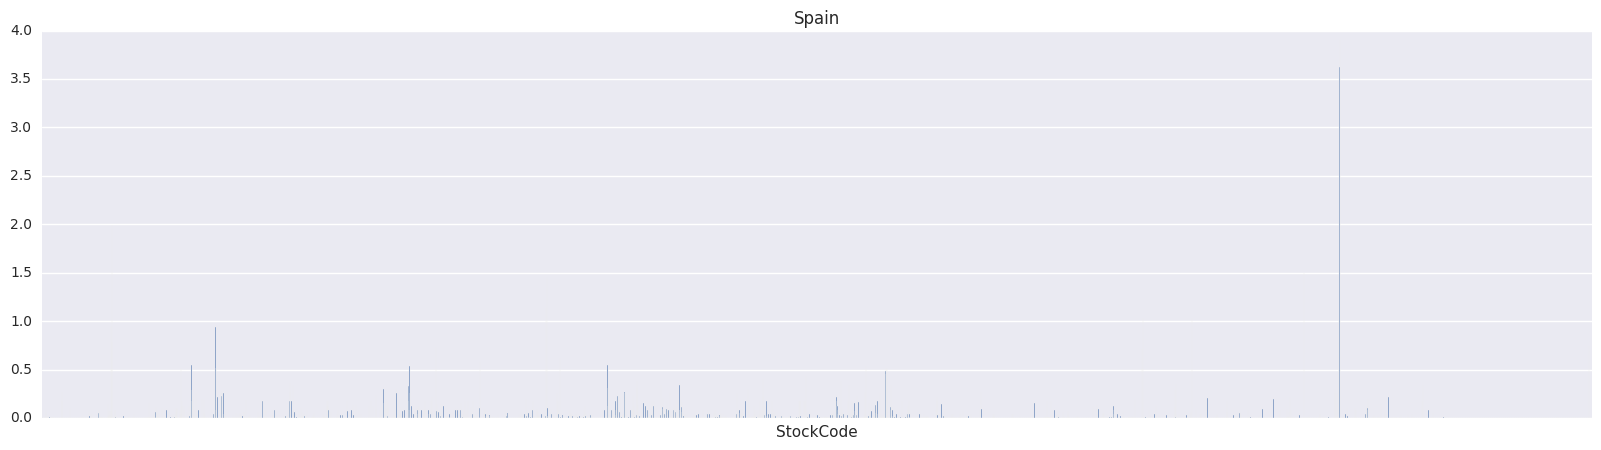

Iceland


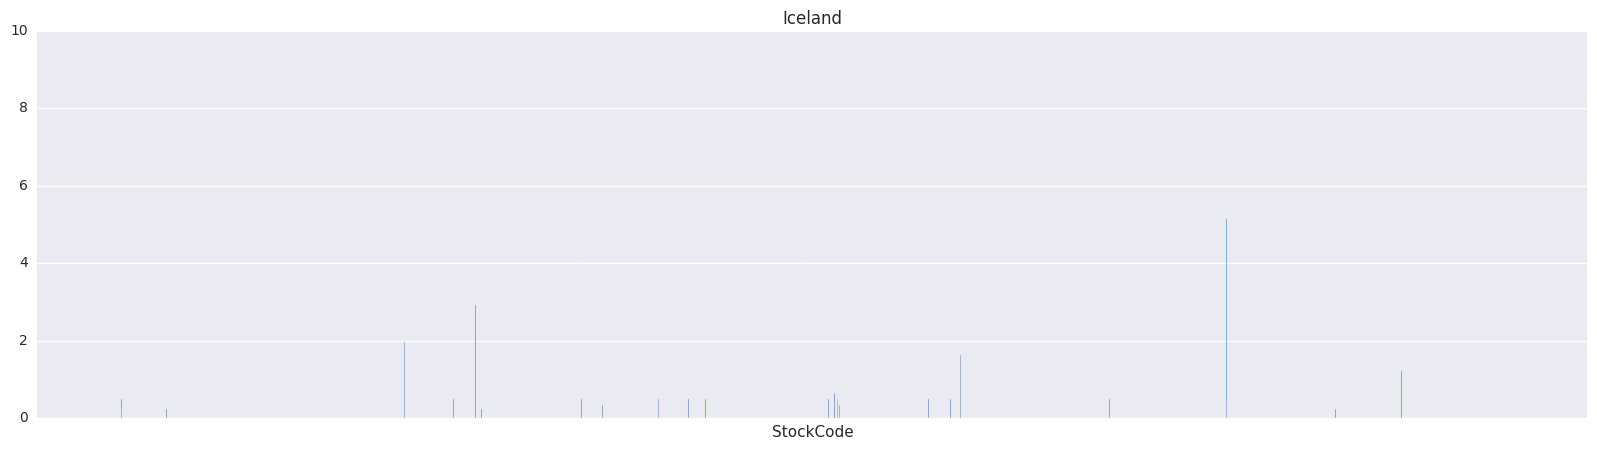

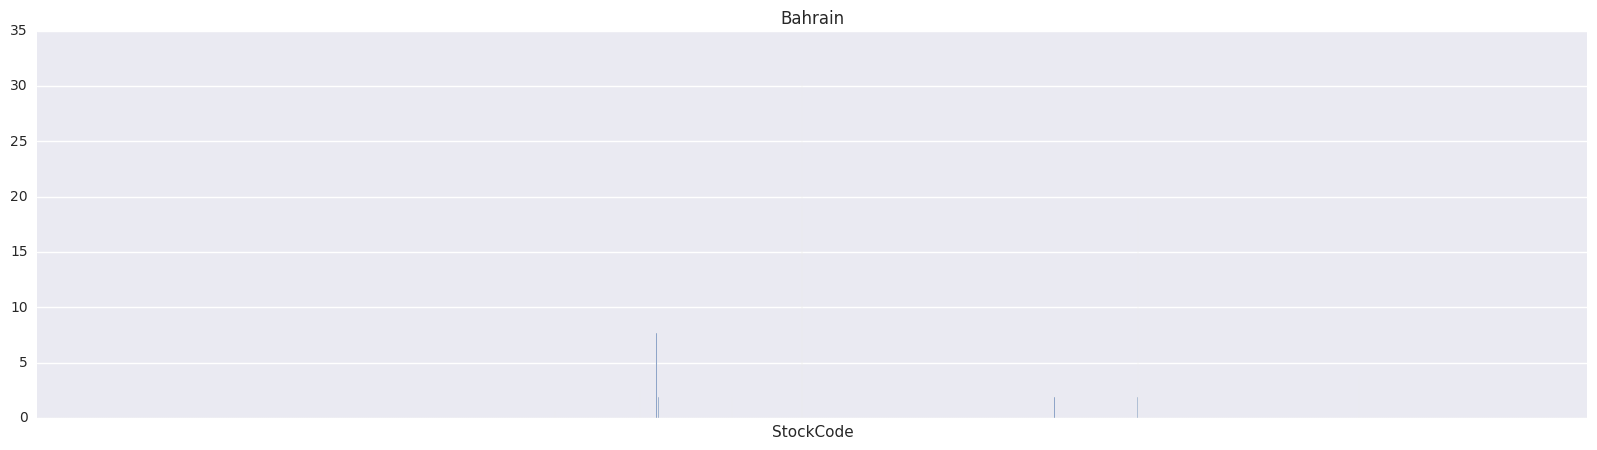

Israel


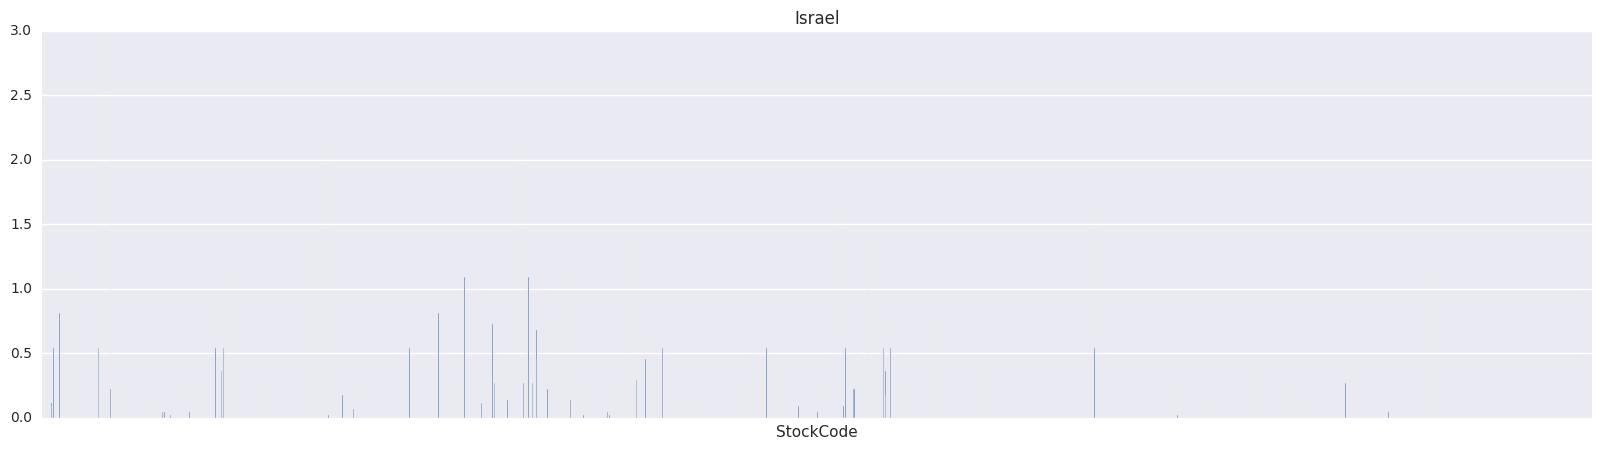

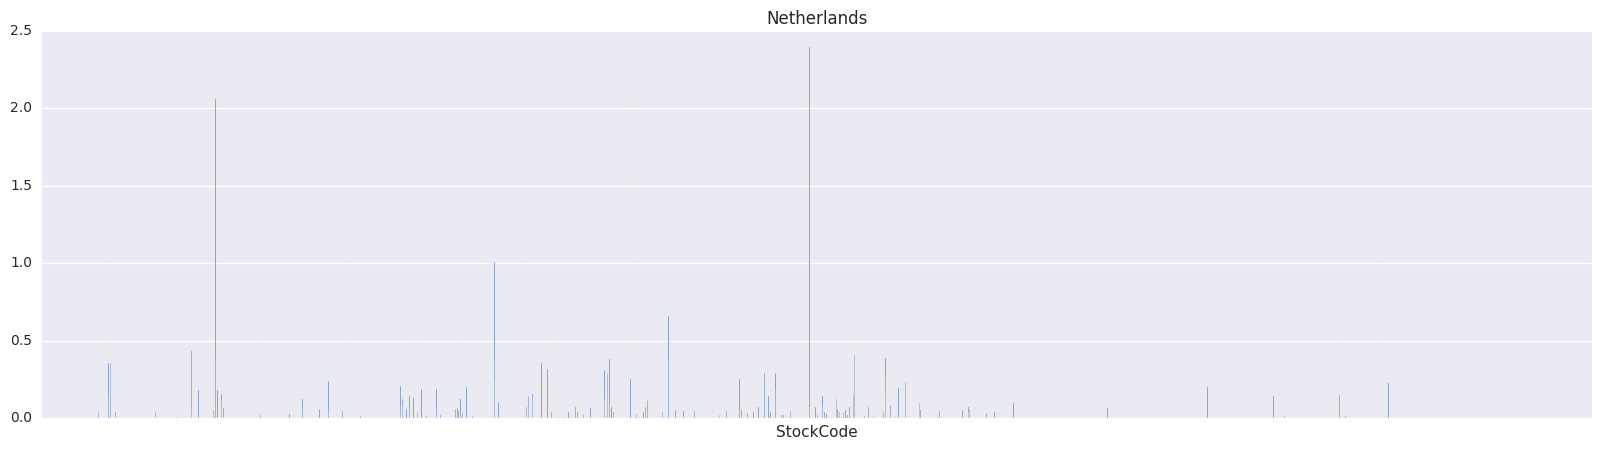

Italy


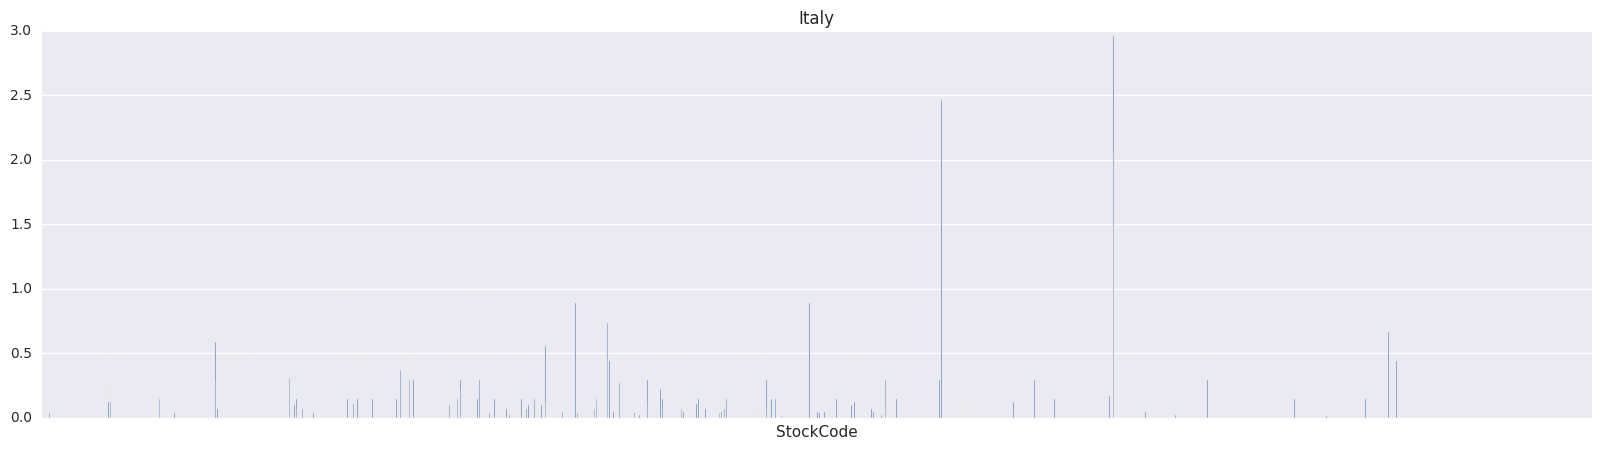

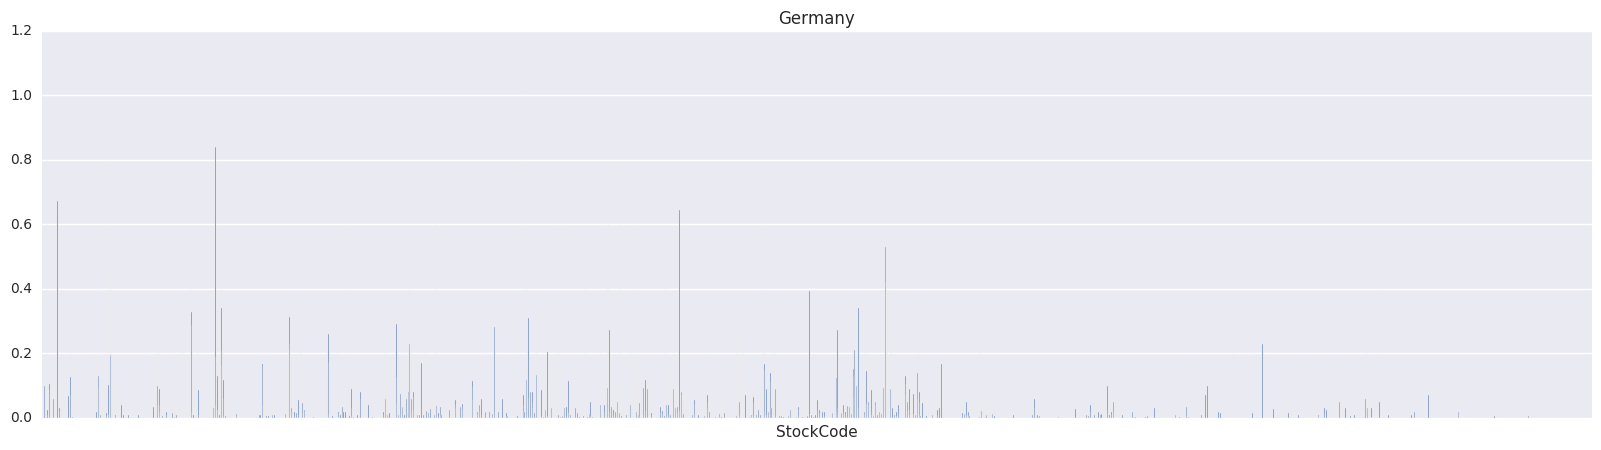

Japan


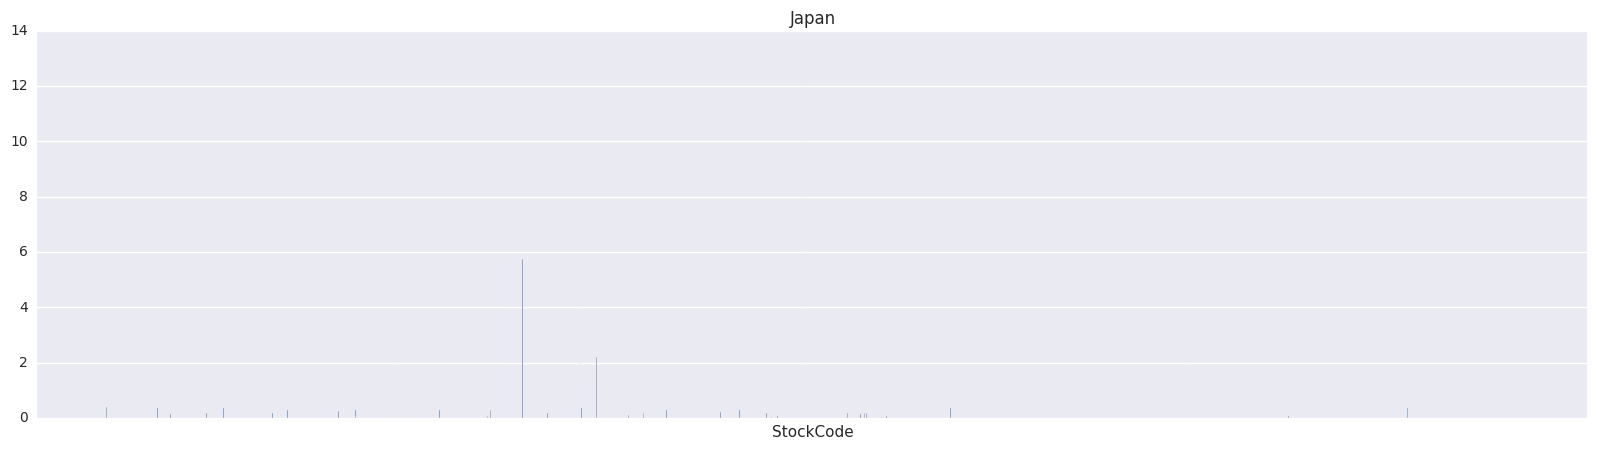

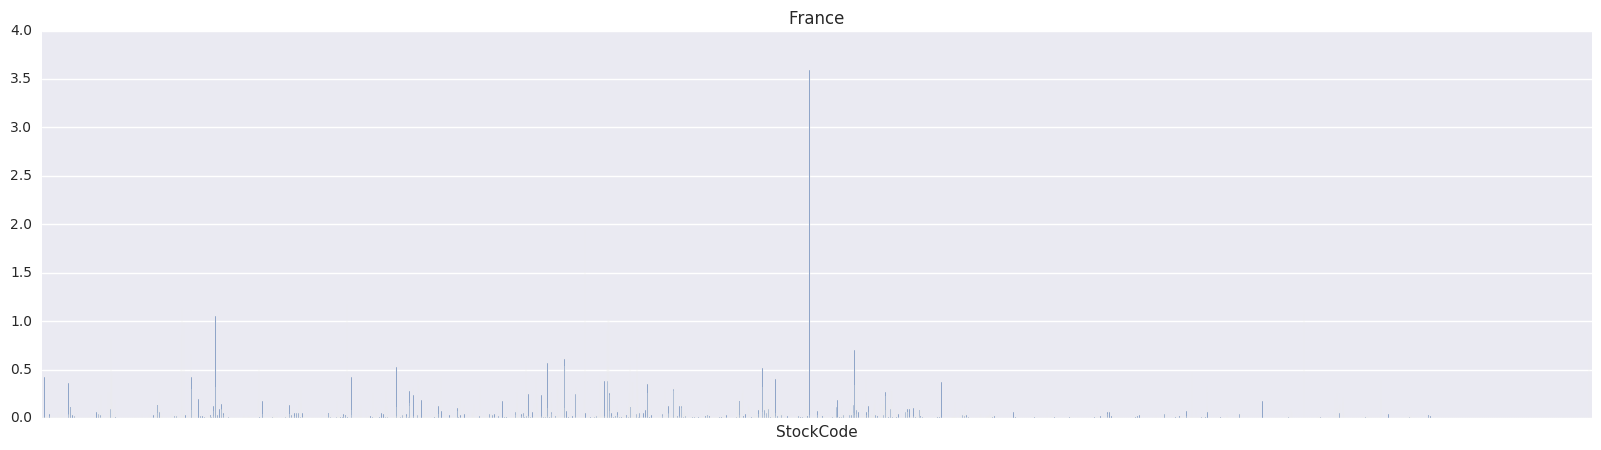

Lebanon


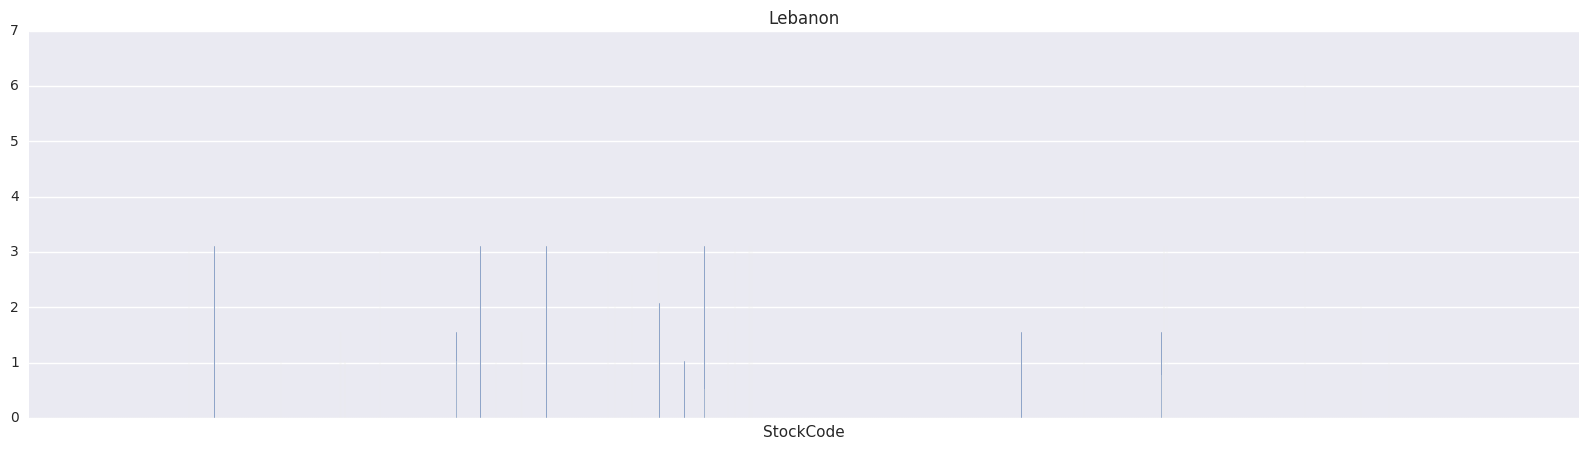

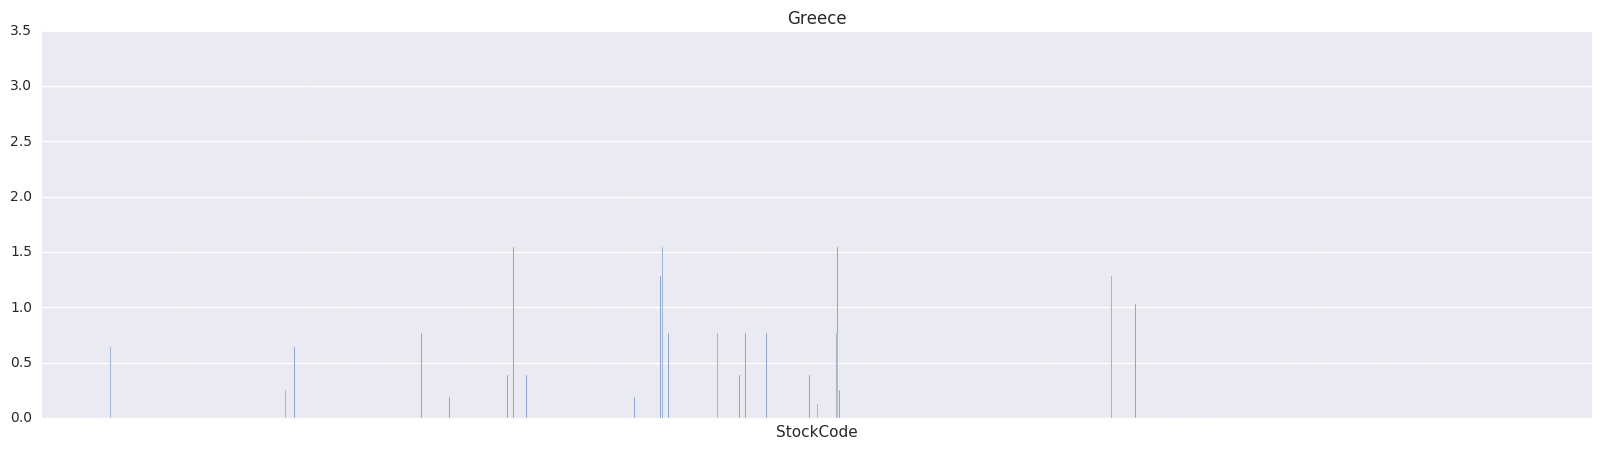

Lithuania


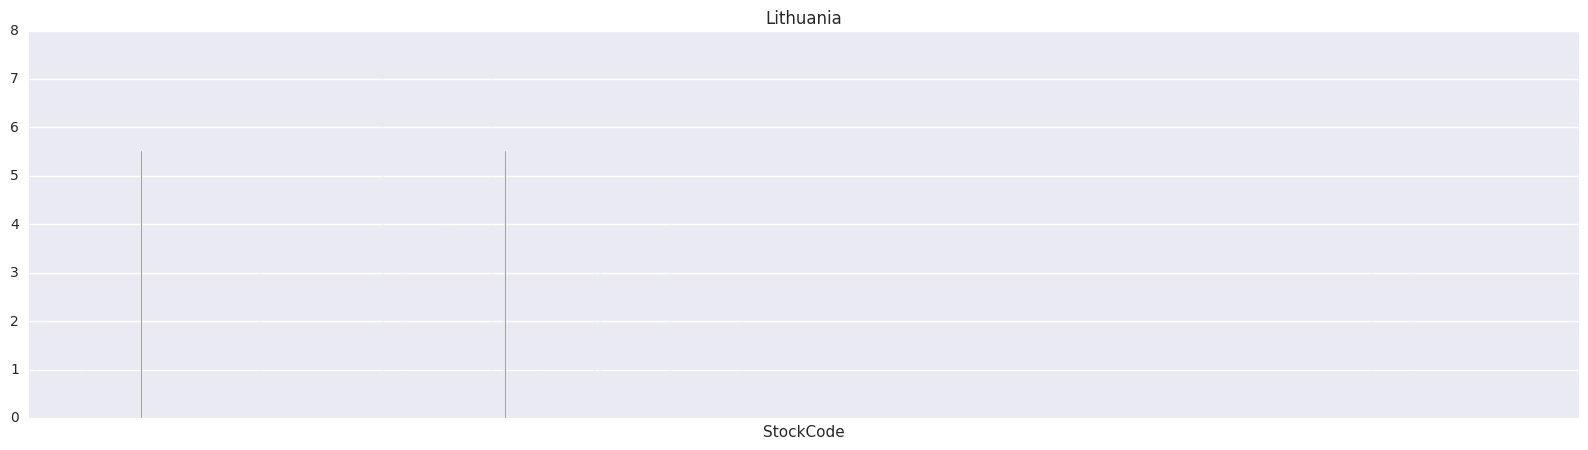

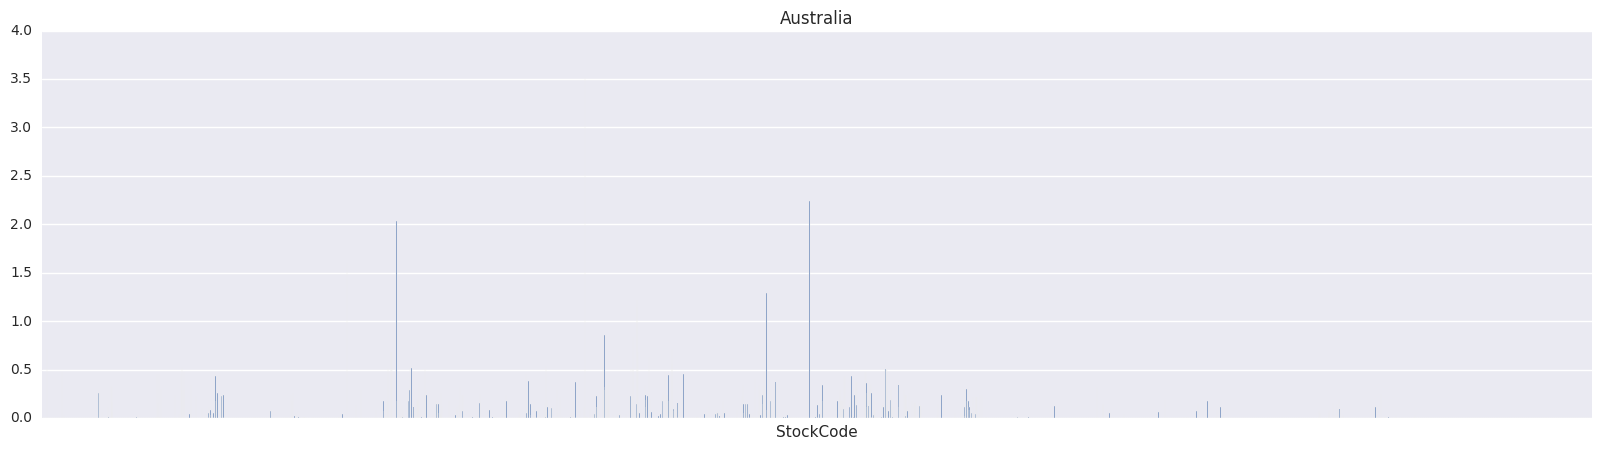

Malta


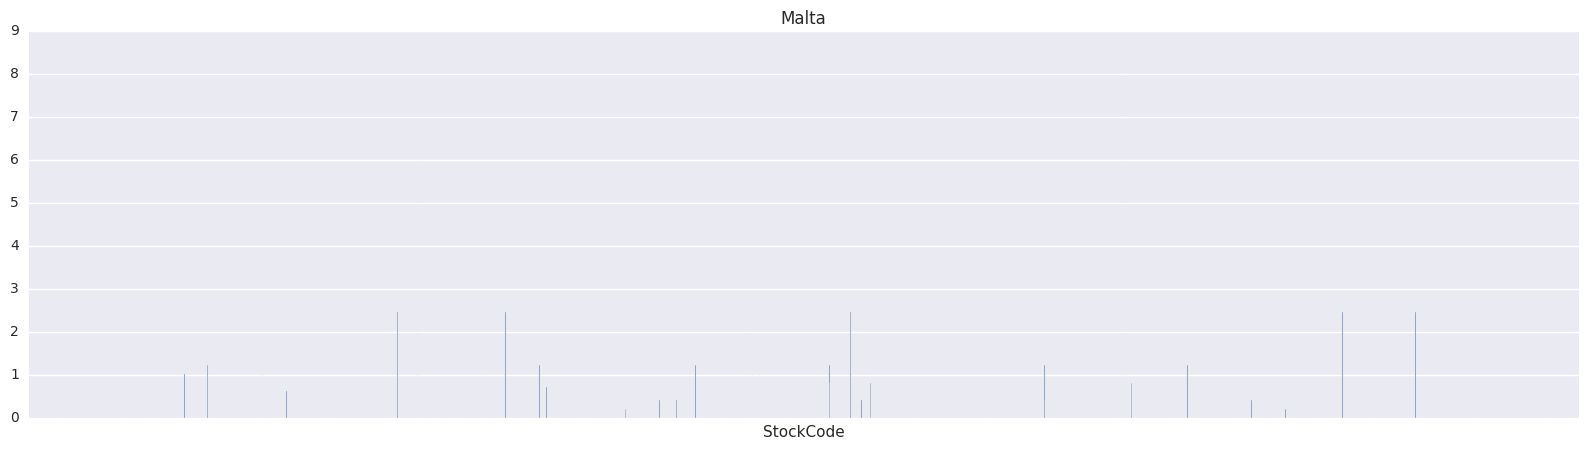

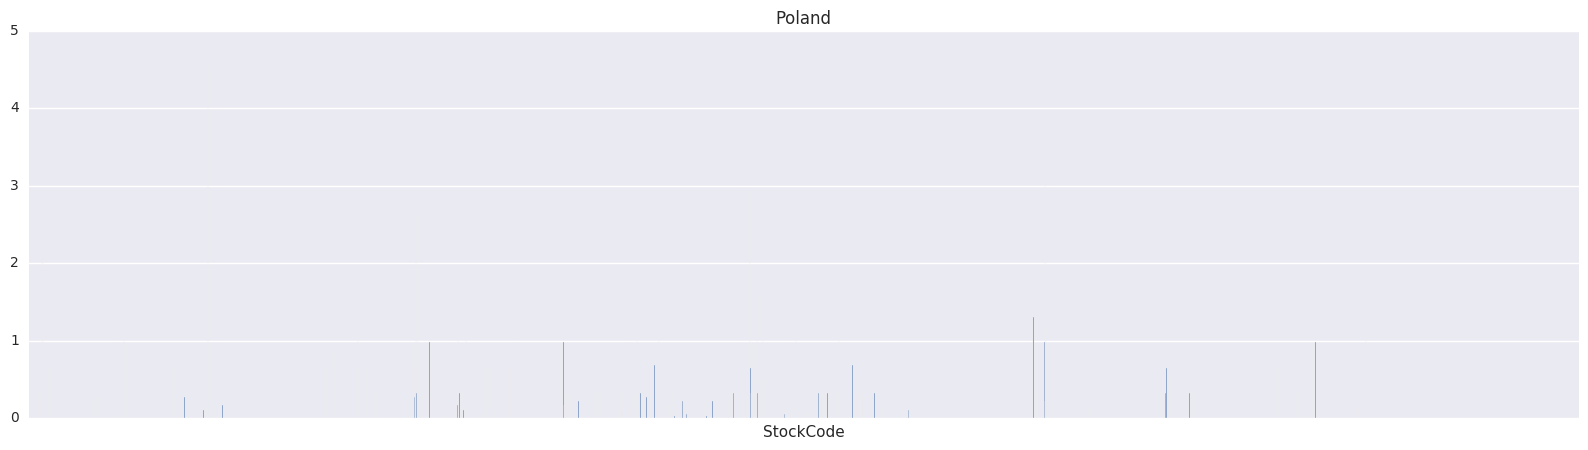

Netherlands


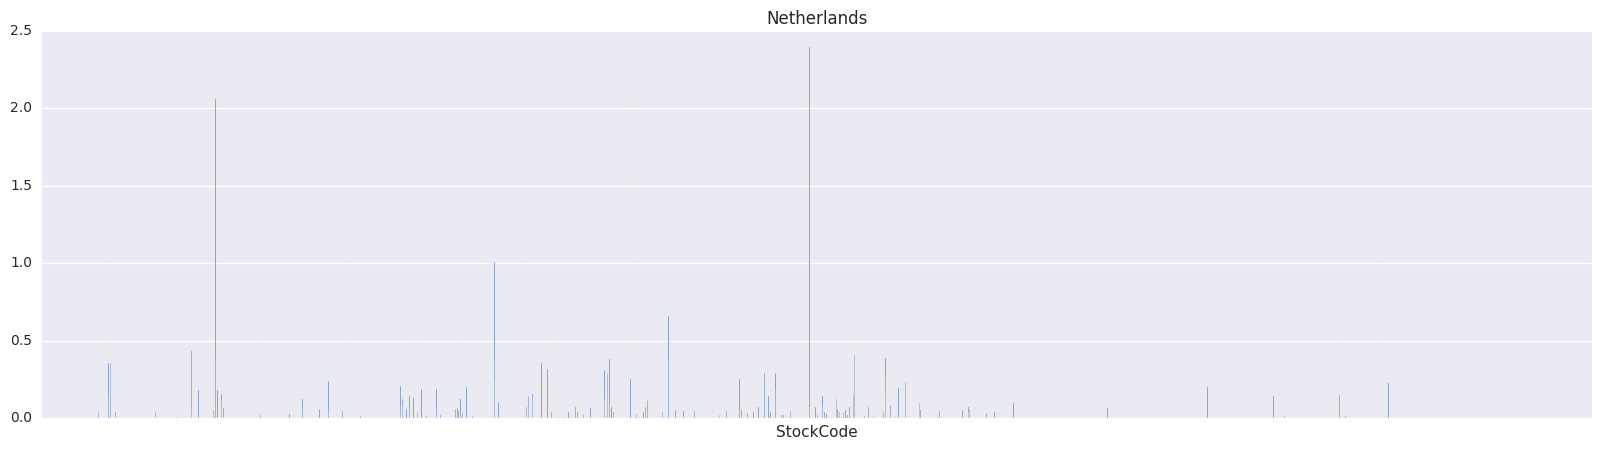

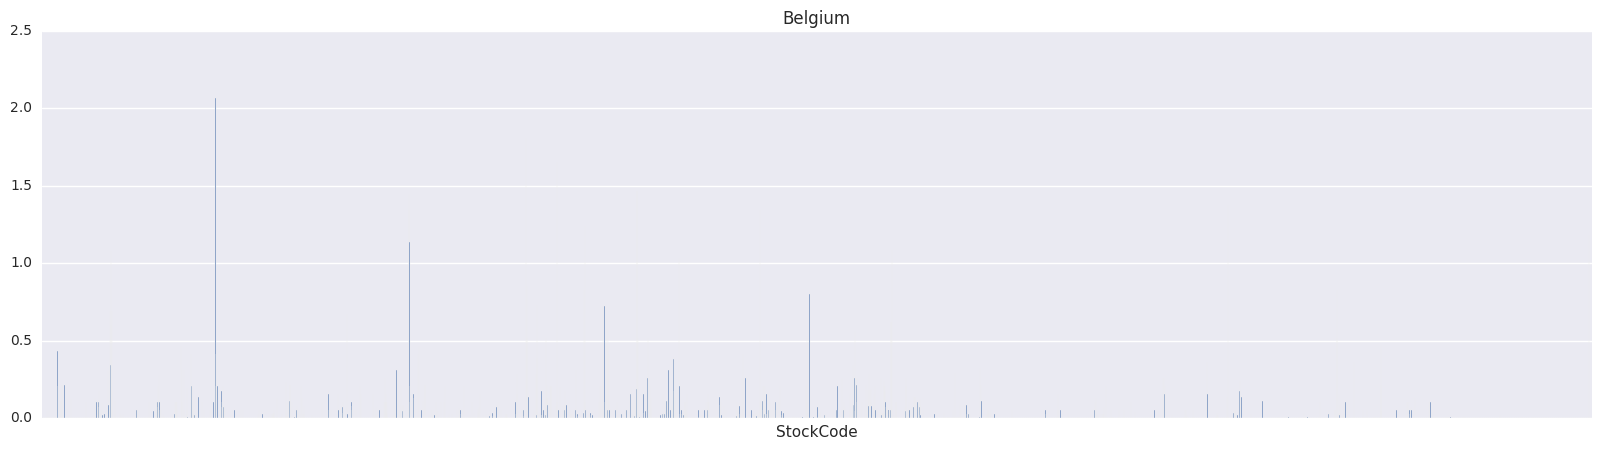

Norway


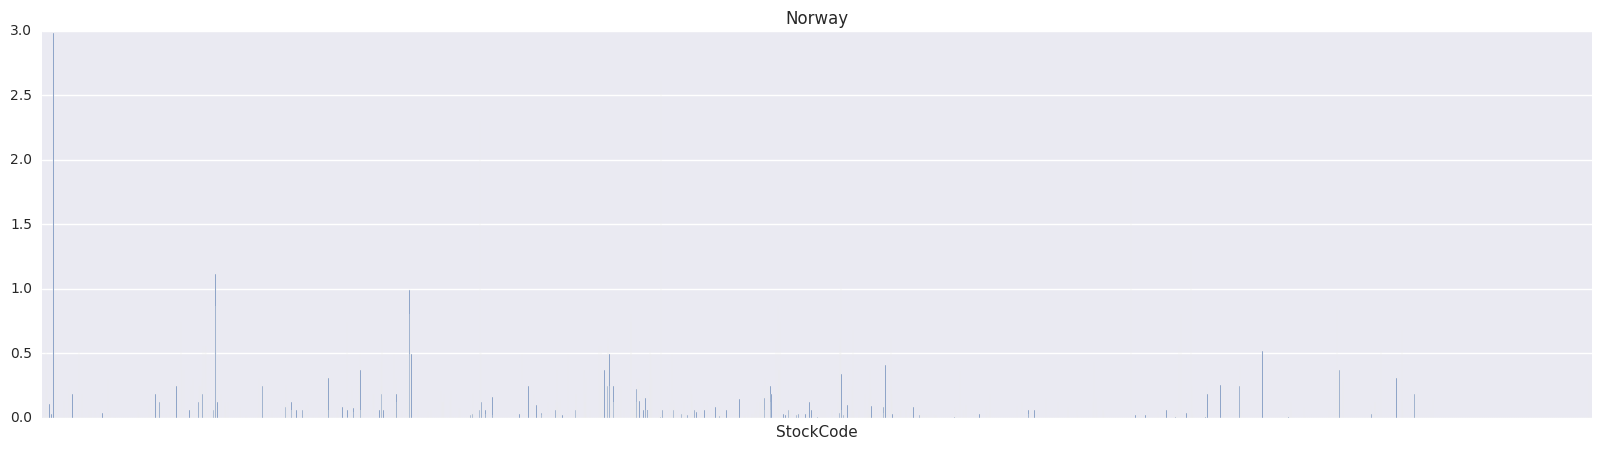

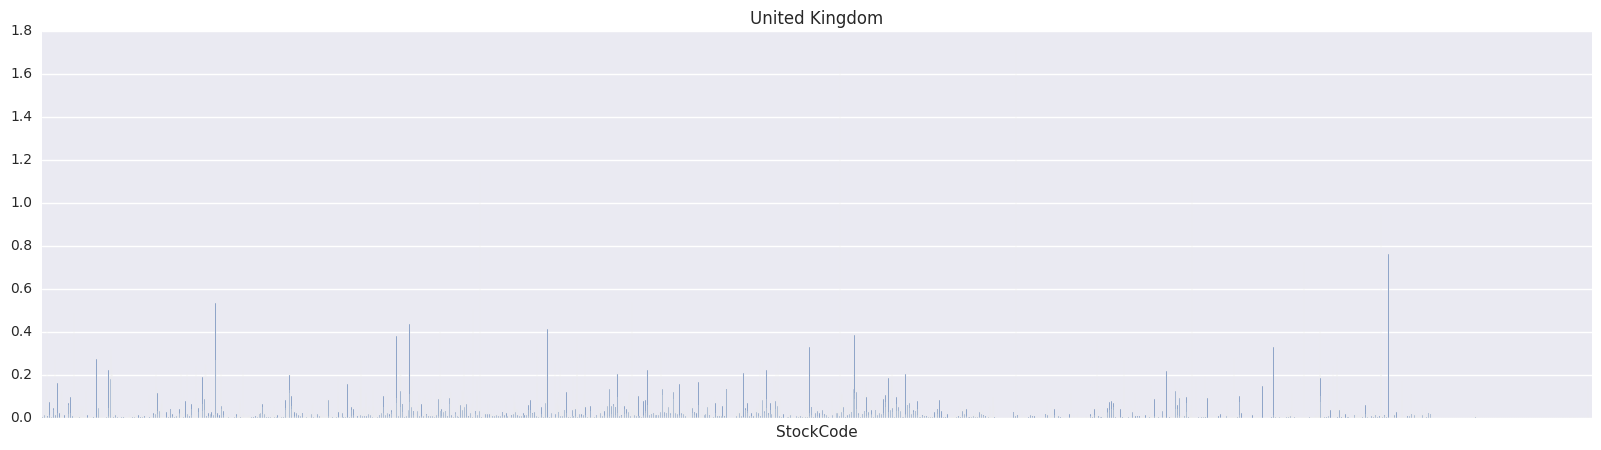

Poland


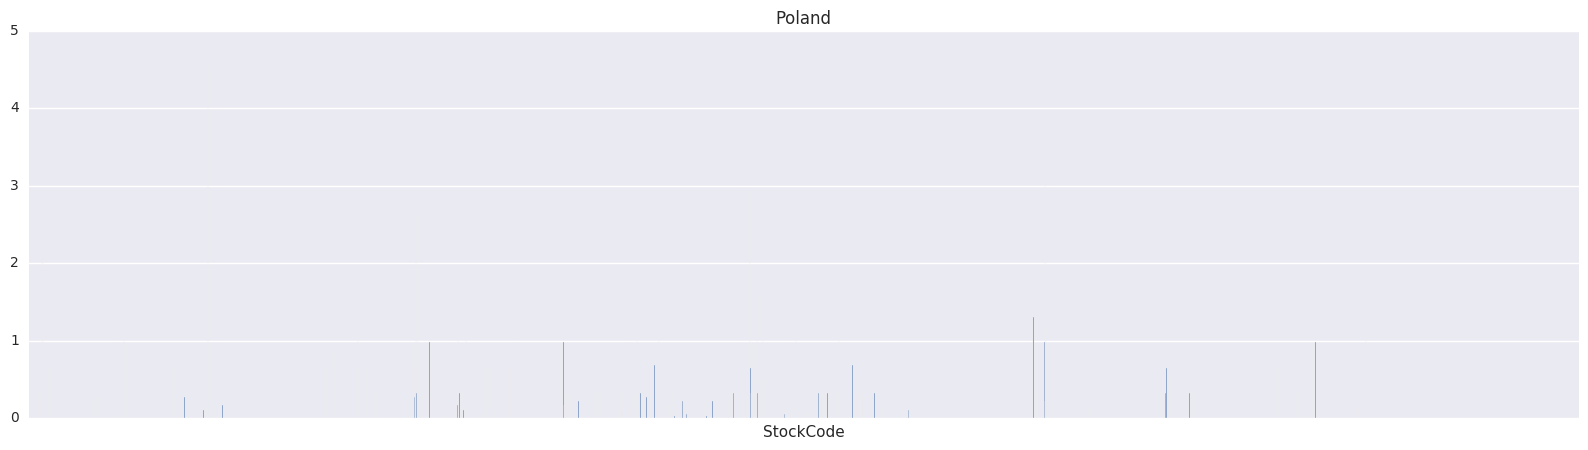

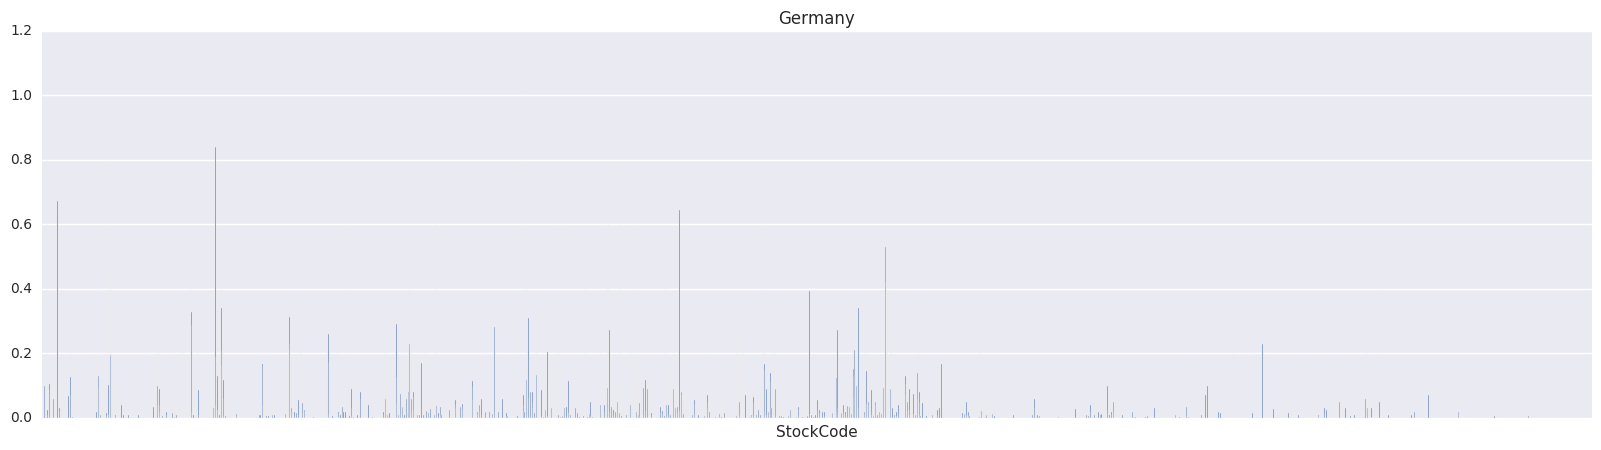

Portugal


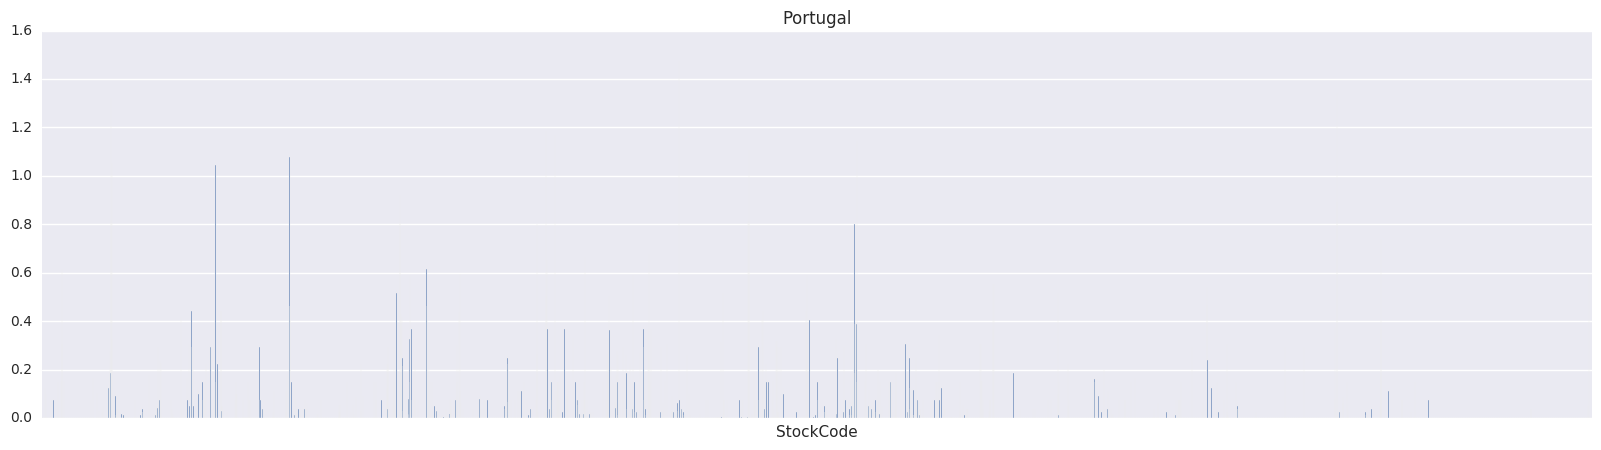

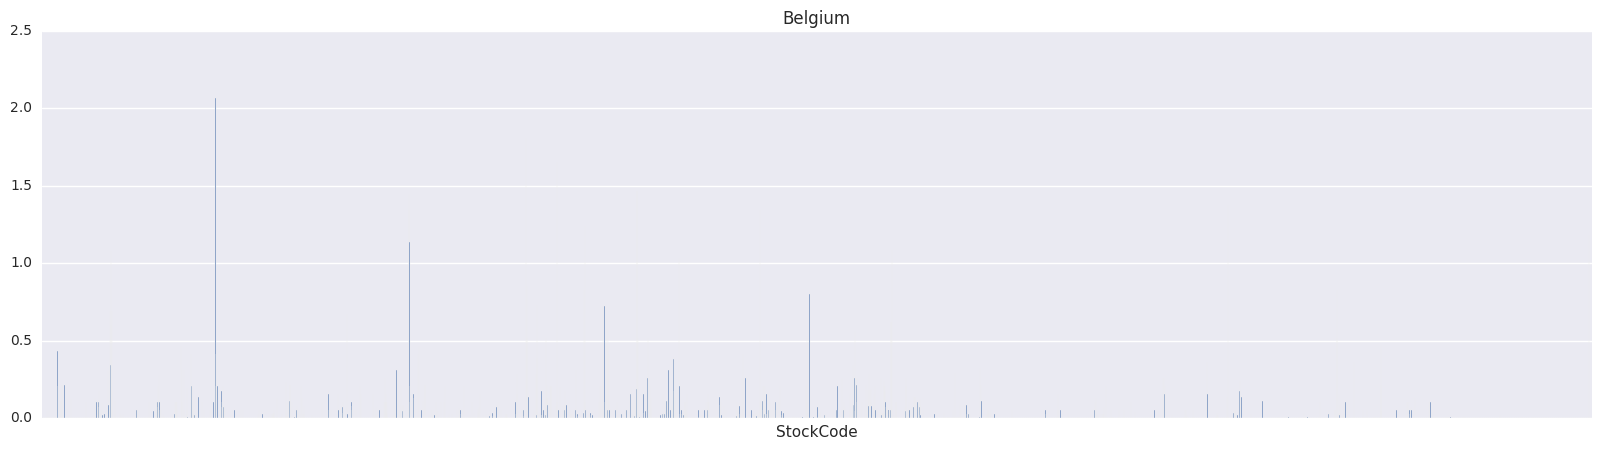

RSA


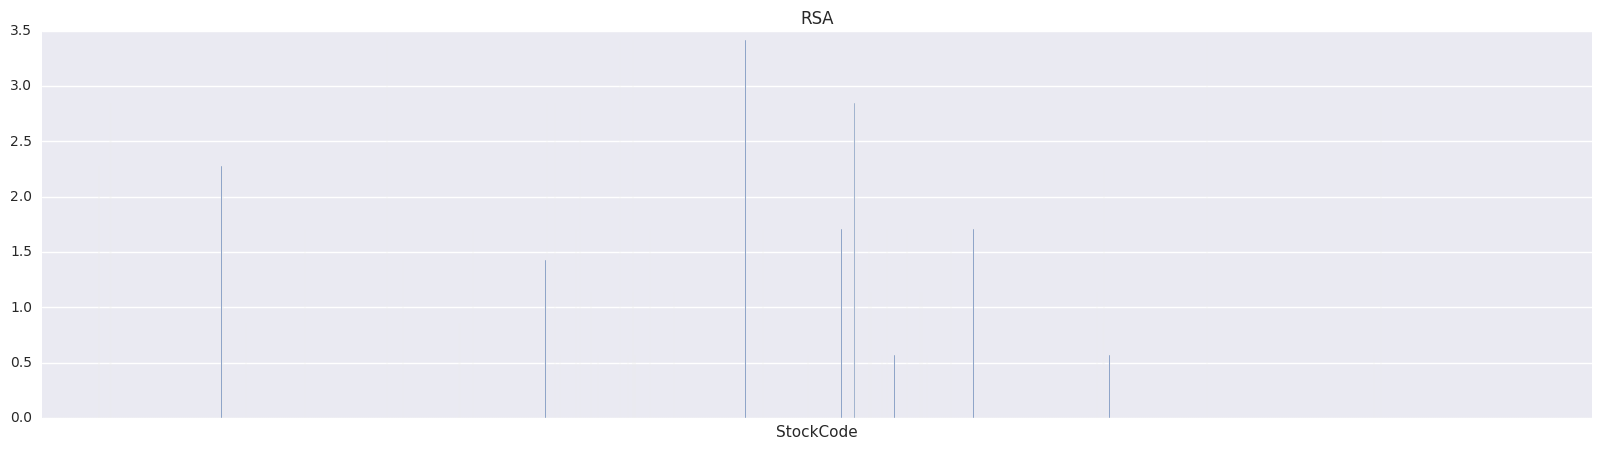

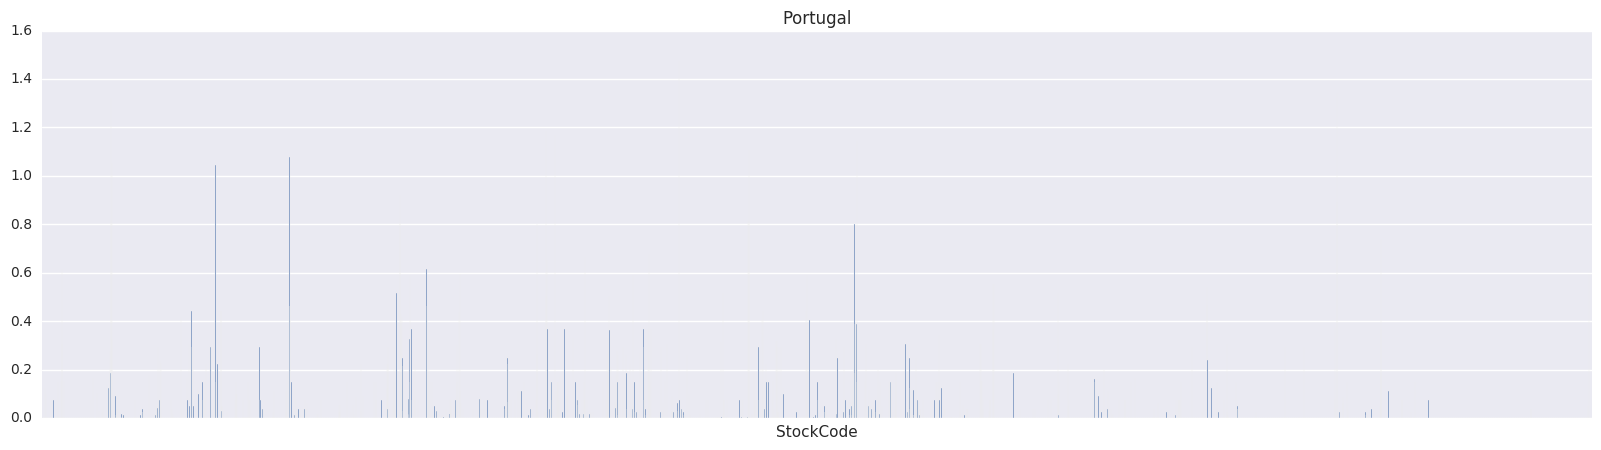

Saudi Arabia


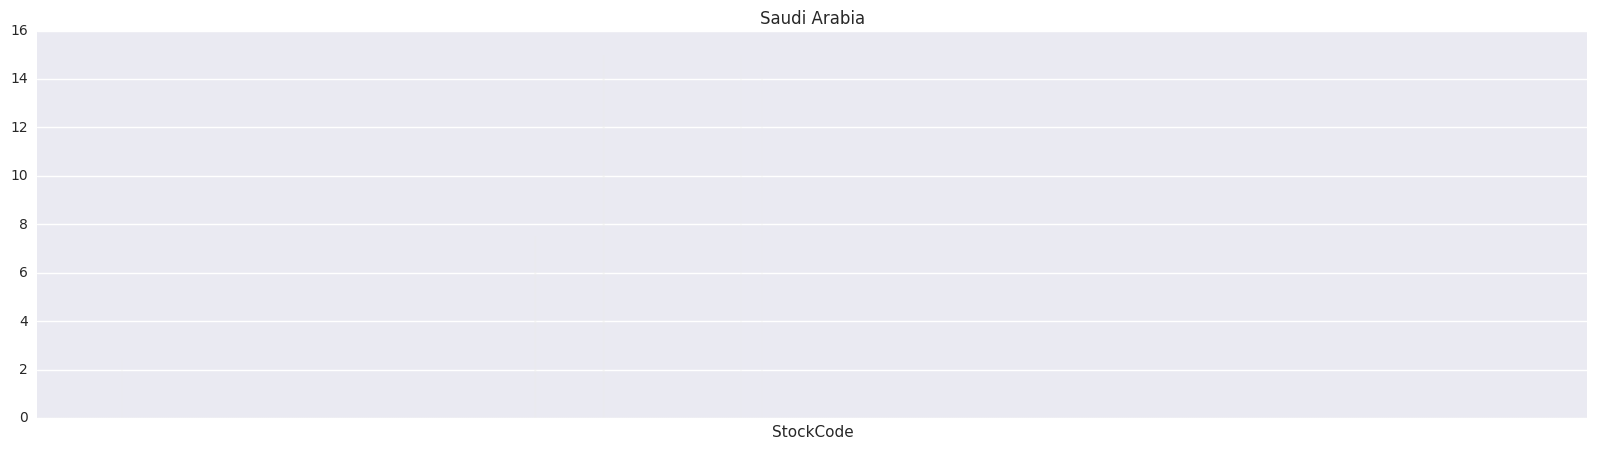

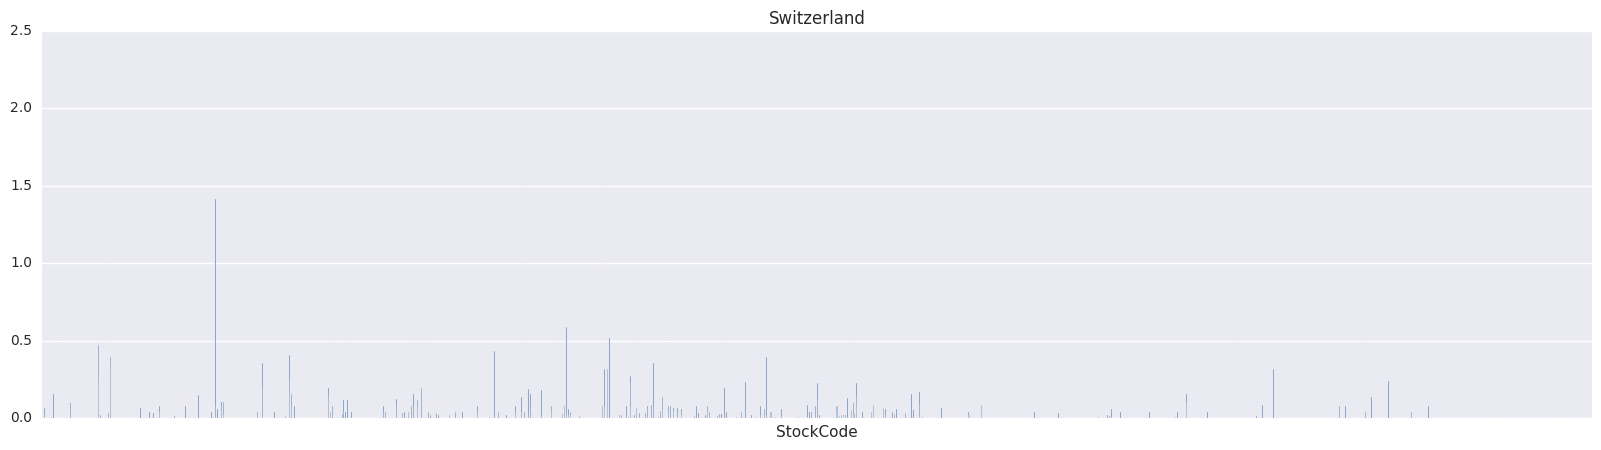

Singapore


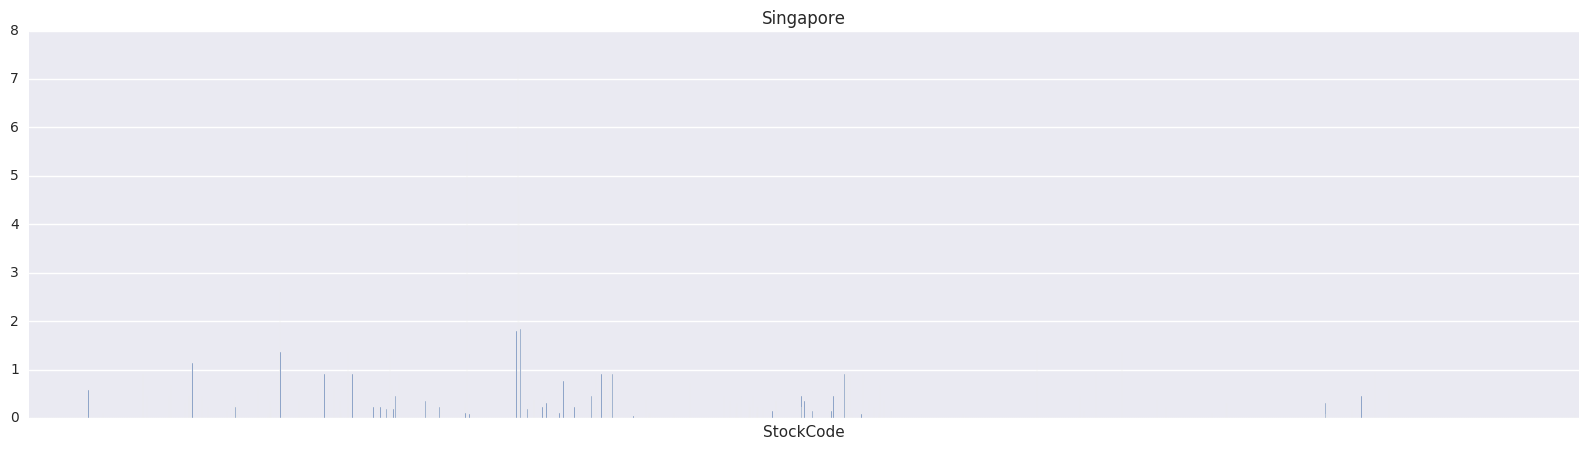

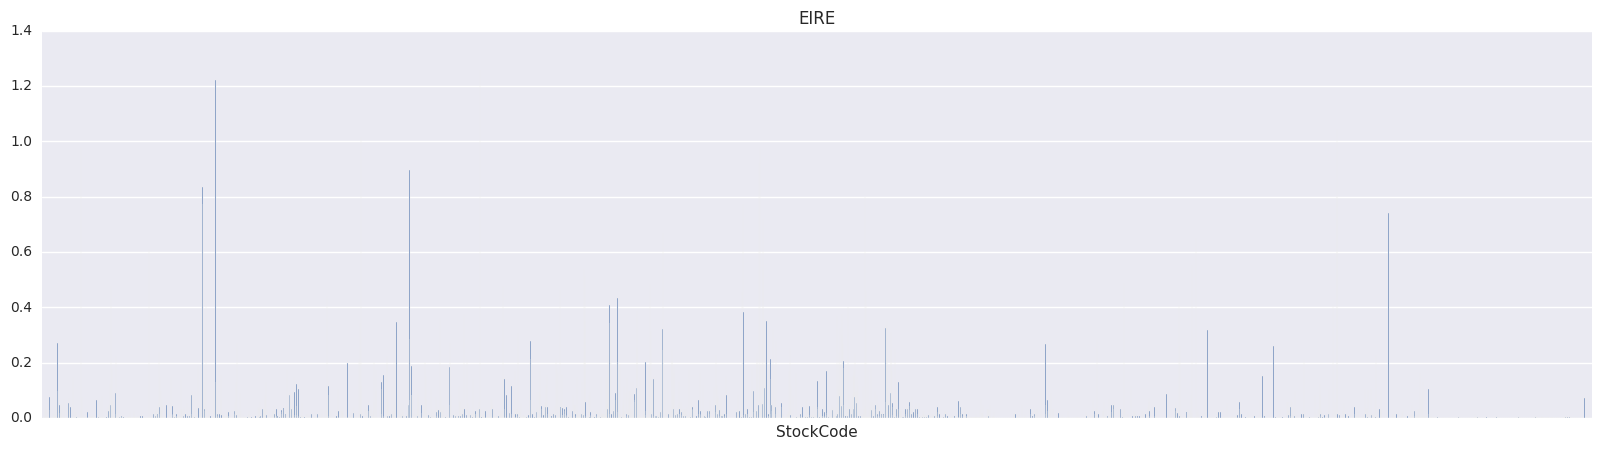

Spain


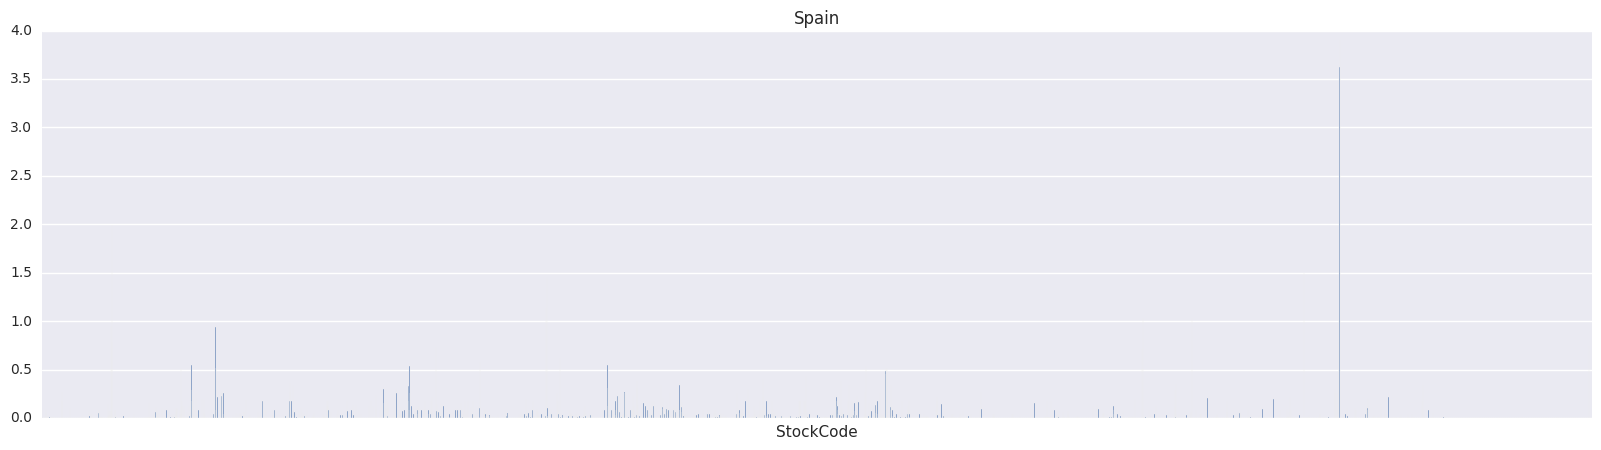

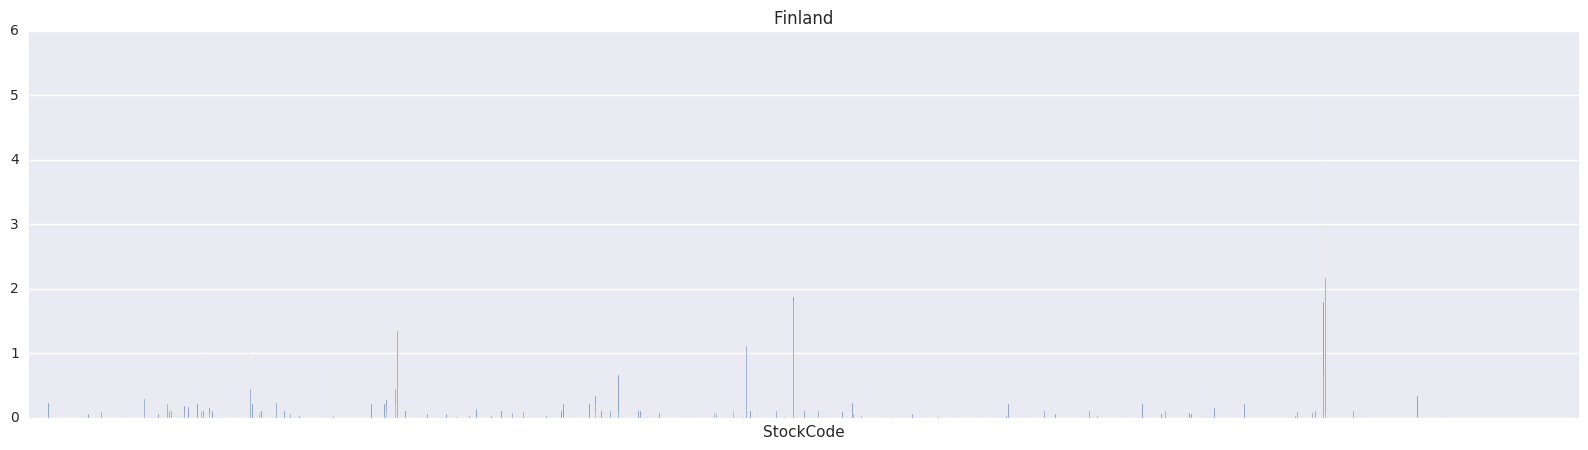

Sweden


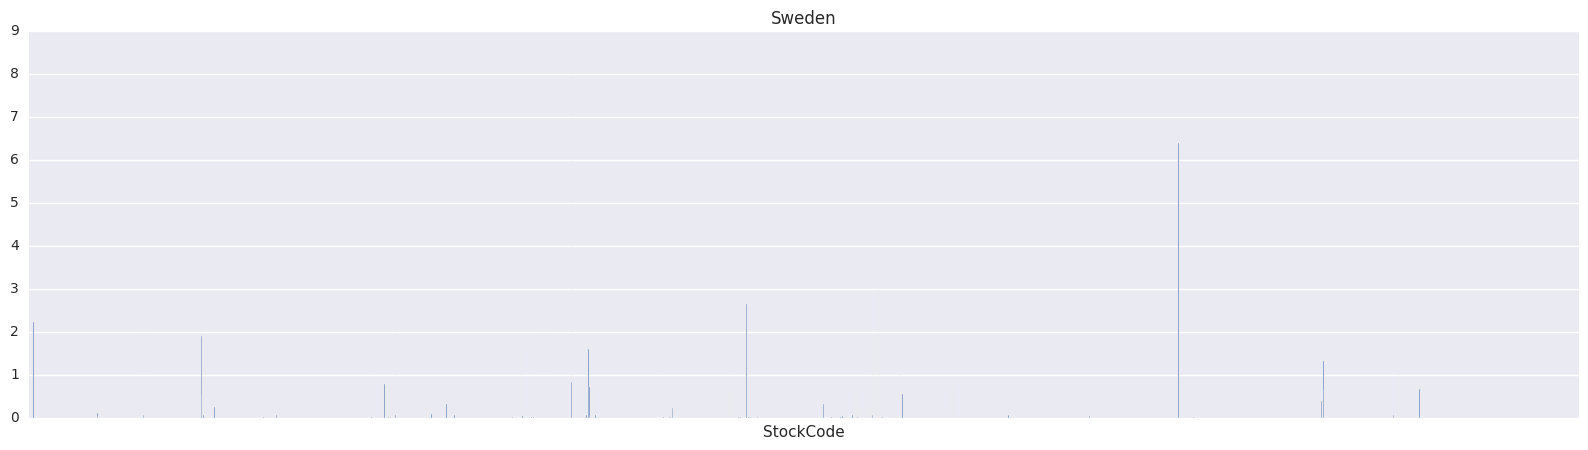

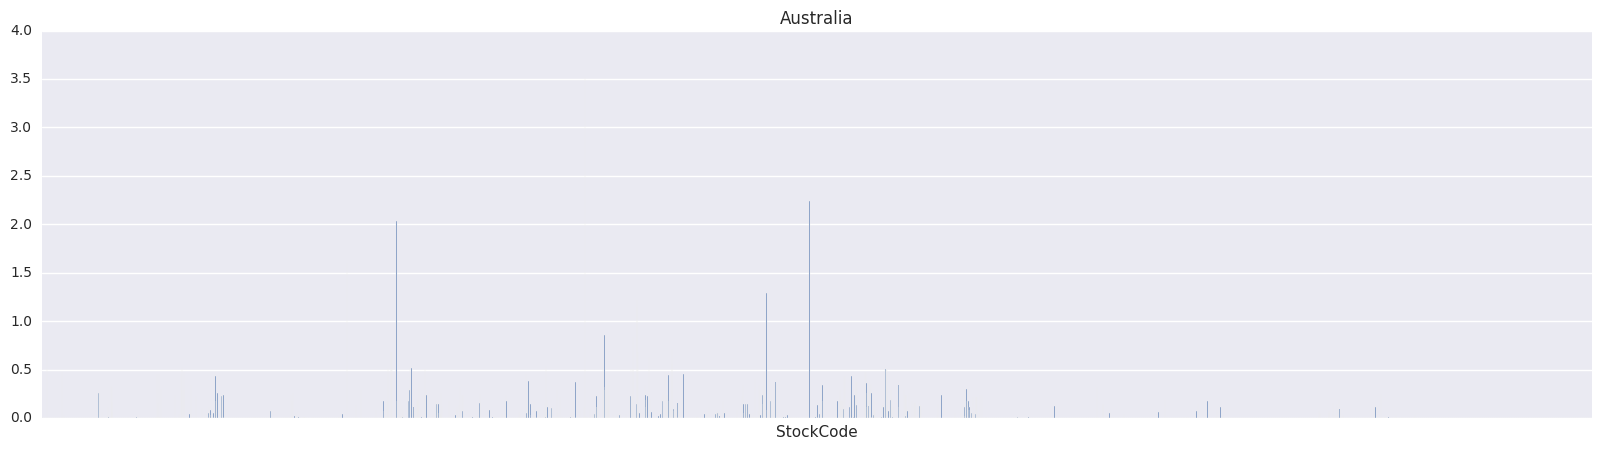

Switzerland


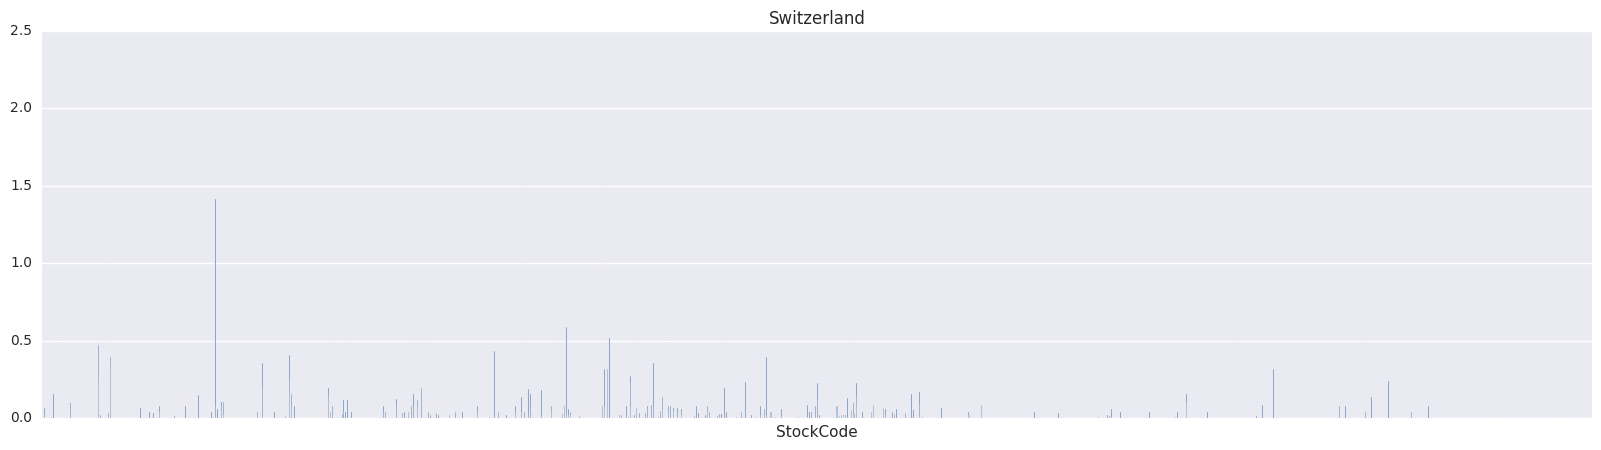

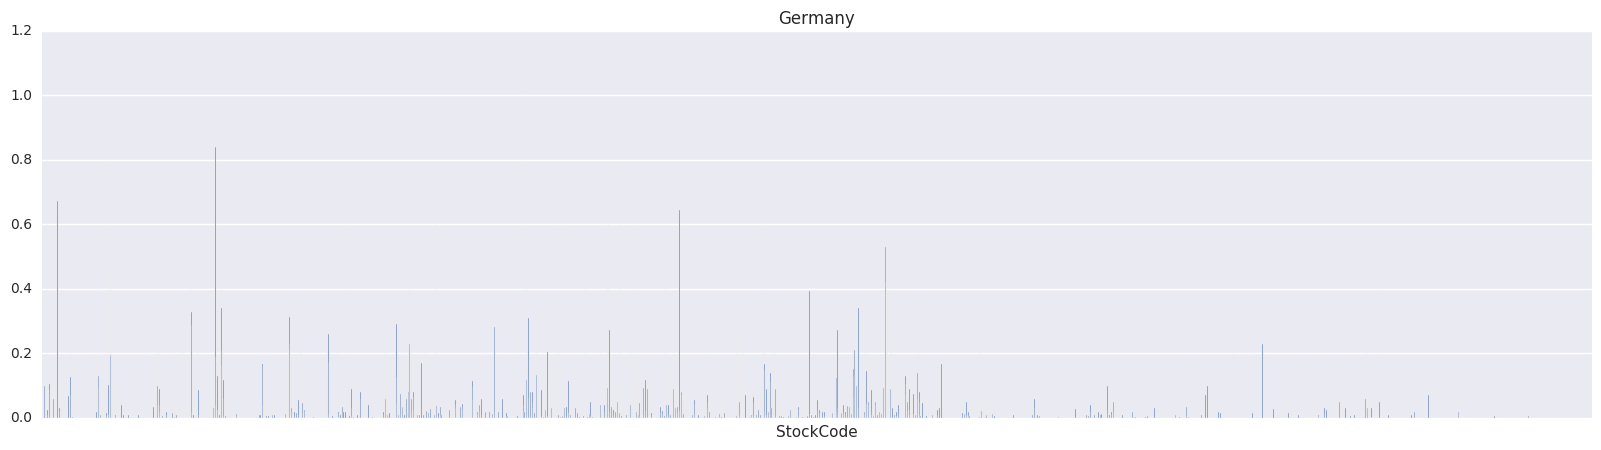

USA


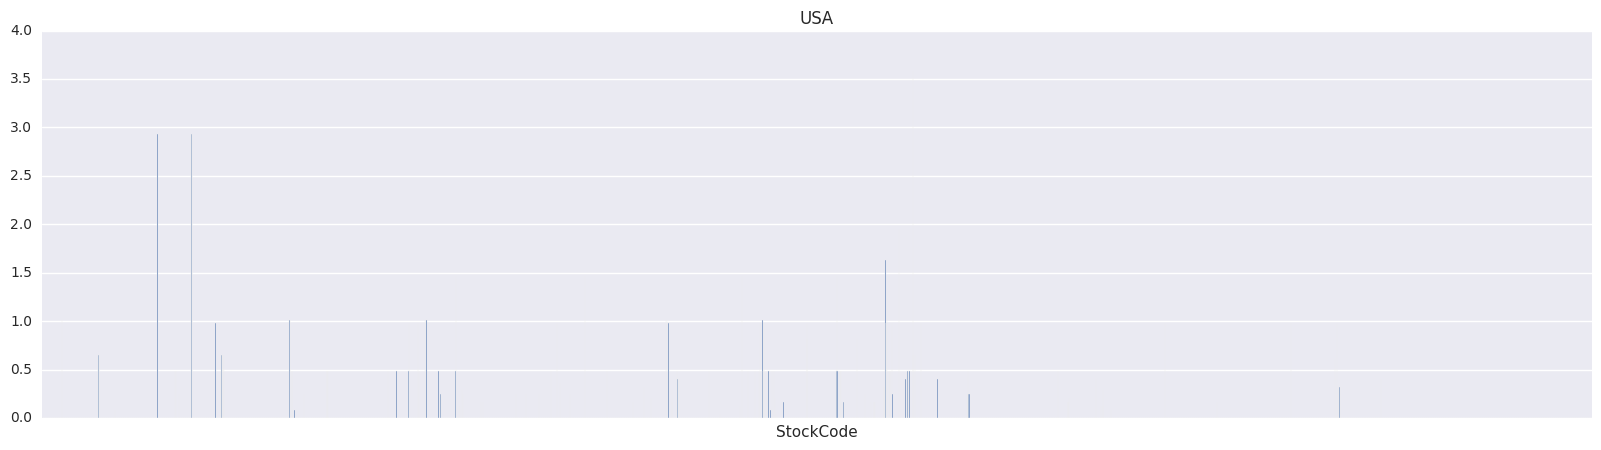

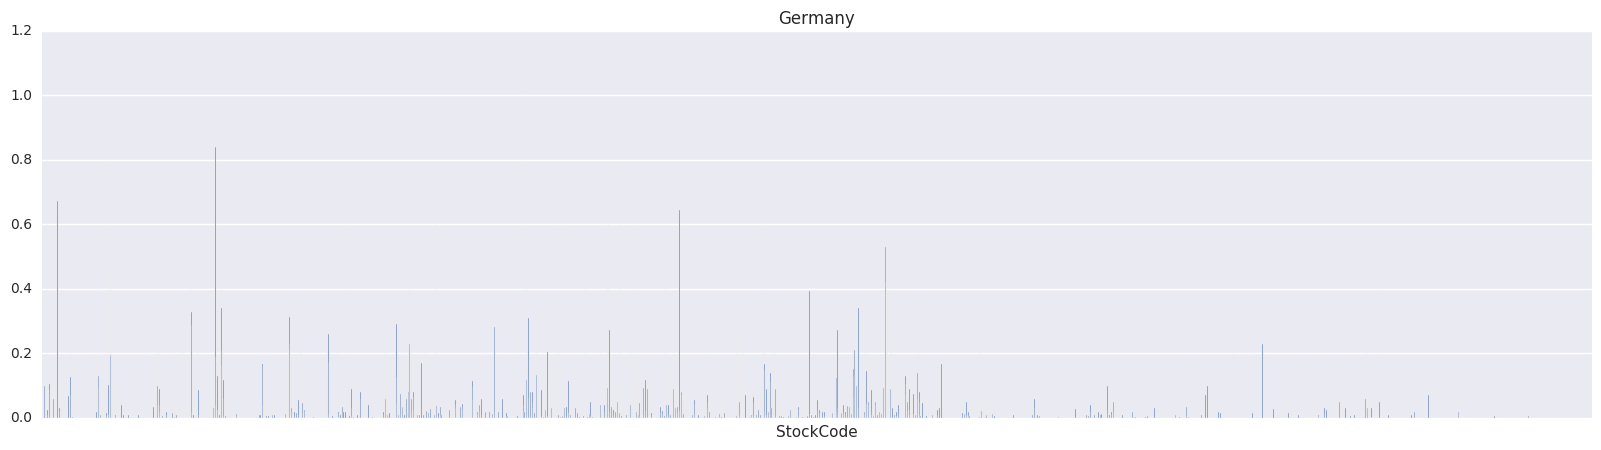

United Arab Emirates


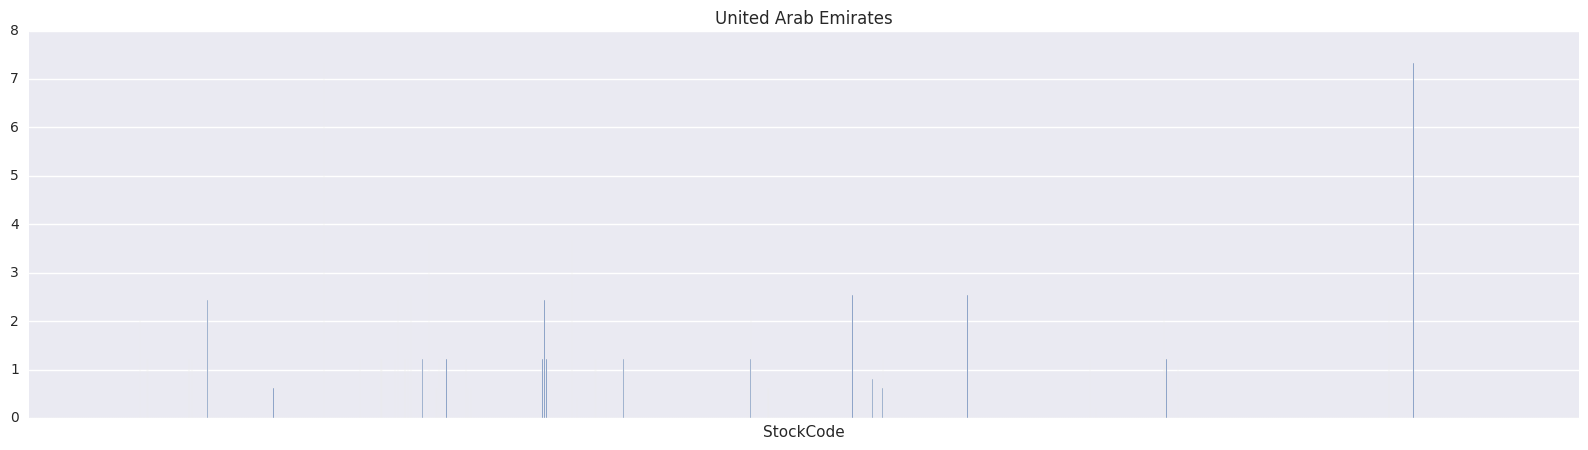

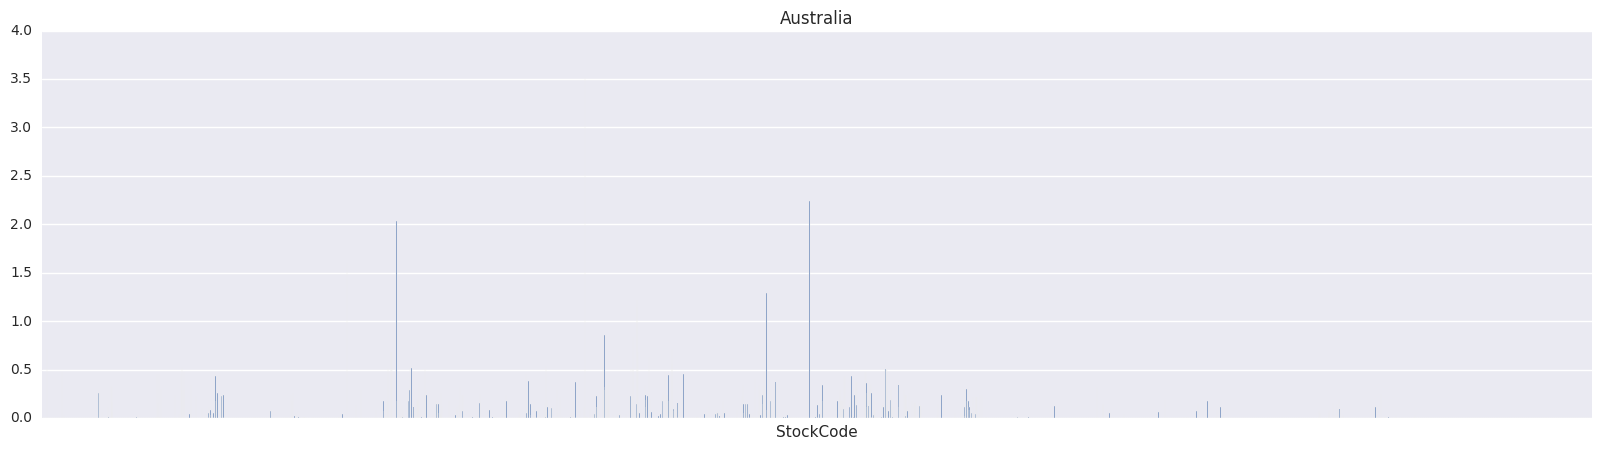

United Kingdom


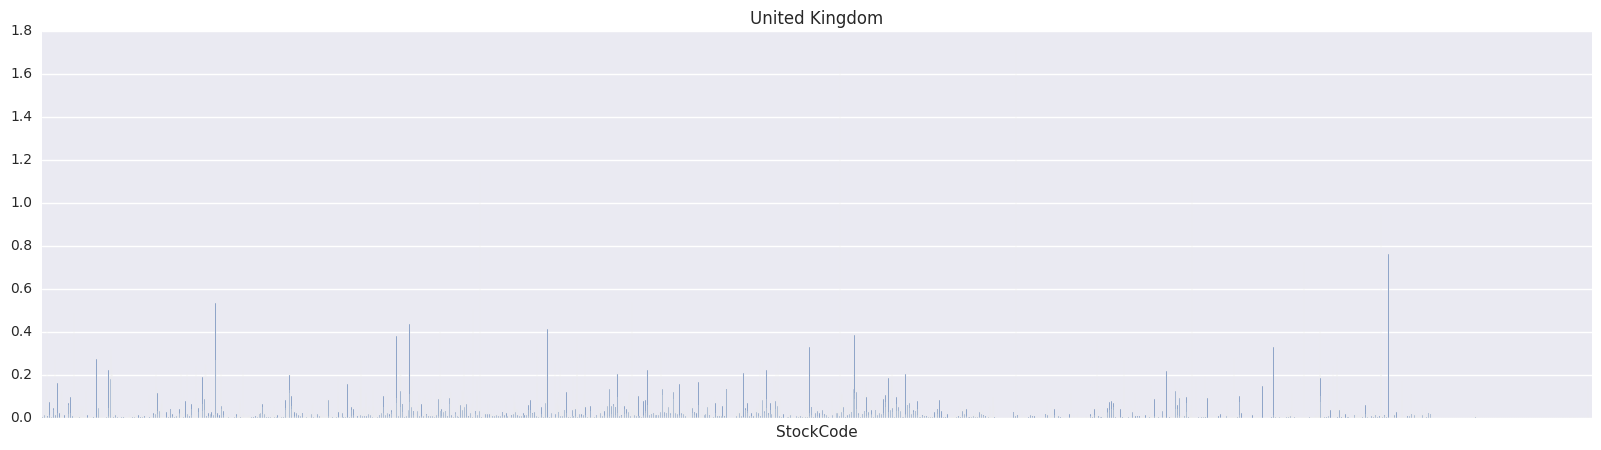

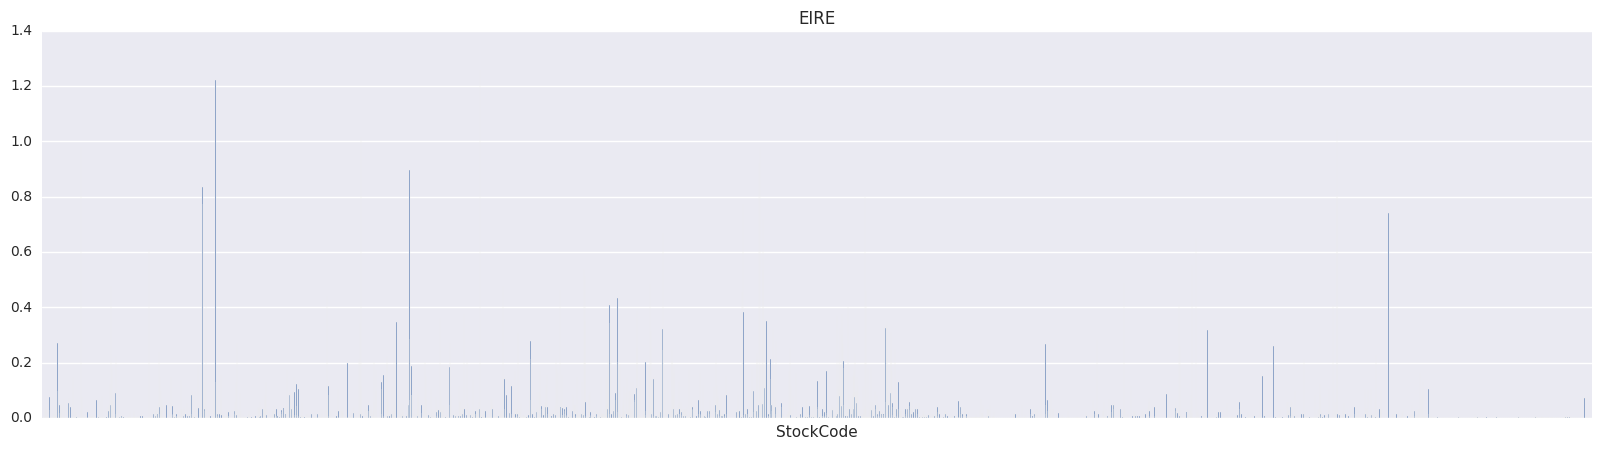

Unspecified


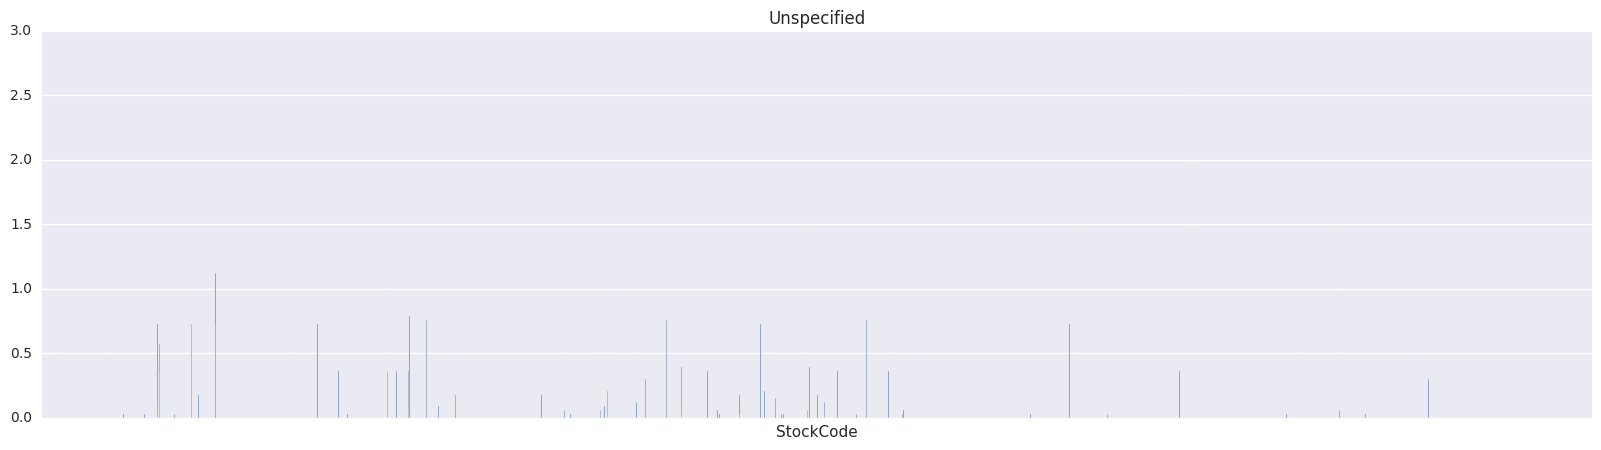

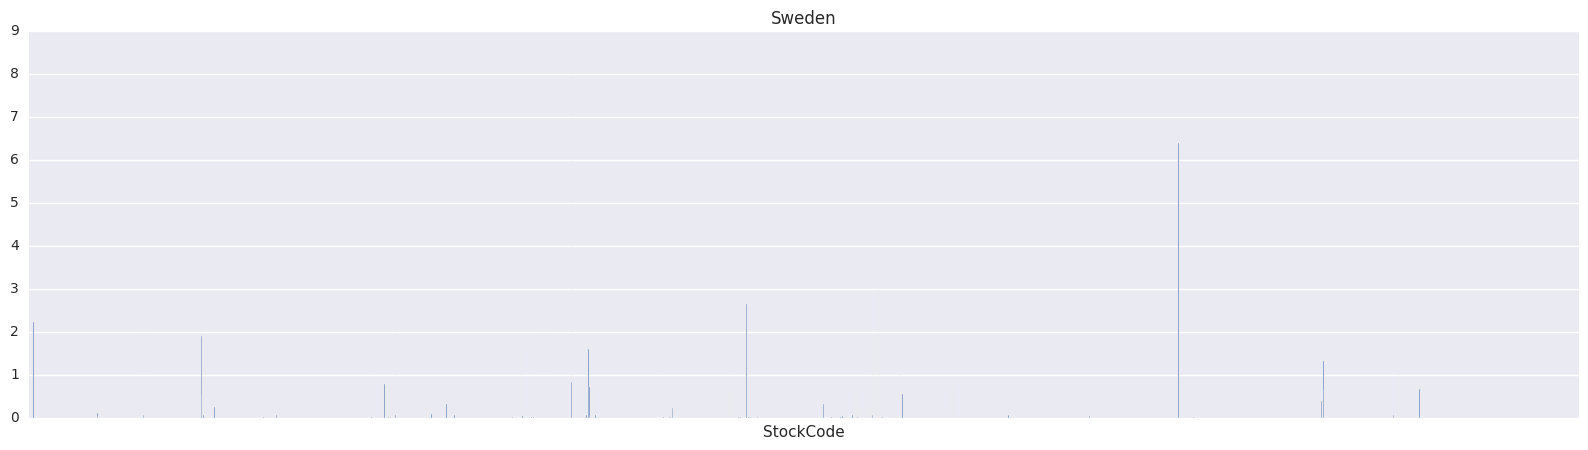

In [127]:
for country in countries:
    print(country)
    plot_item_ratio_of(country)
    plot_item_ratio_of(list(most_similar_country_dict[country].keys())[0])